In [3]:
import matplotlib.pyplot as plt
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.model_selection import train_test_split

sys.path.append('../src')
from clean_df import *
from sort_lyrics_to_genre import *
from countvec import *

pd.options.display.max_rows = 200


ModuleNotFoundError: No module named 'countvec'

## Choosing the right dataset

In [2]:
last20 = pd.read_csv('../data/weekly_billboardHot100_1999-2019.csv')
pd.set_option('display.max_colwidth', -1)

billboard_hot100 = clean_df(last20)

billboard_hot100.head(1)

unnamed:_0   artists           name  weekly.rank  peak.position  \
0  1           Lil Nas,  Old Town Road  1            1.0             

   weeks.on.chart        week           date  \
0  7.0             2019-07-06  April 5, 2019   

                                                                          genre  \
0  Country,Atlanta,Alternative Country,Hip-Hop,Trap,Memes,Remix,Country Rap,Rap   

                                                 writing.credits  \
0  Jozzy, Atticus ross, Trent reznor, Billy ray cyrus, Lil nas x   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         lyrics  \
0  Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm gonna take my horse to the old town road\nI'm gonna ride til I can't no more\nI'm gonna take my horse to the old town road\nI'm gonna ride til I can't no more\nKio, Kio\nI got the horses in the back\nHorse tack is attached\nHat is matte black\nGot the boots that's black to match\nRiding on a horse, ha\nYou can whip your Porsche\nI been in the valley\nYou ain't been up off that porch, now\nCan't nobody tell me nothin'\nYou can't tell me nothin'\nCan't nobody tell me nothin'\nYou can't tell me nothin'\nRiding on a tractor\nLean all in my bladder\nCheated on my baby\nYou can go and ask her\nMy life is a movie\nBull riding and boobies\nCowboy hat from Gucci\nWrangler on my booty\nCan't nobody tell me nothin'\nYou can't tell me nothin'\nCan't nobody tell me nothin'\nYou can't tell me nothin'\nYeah, I'm gonna take my horse to the old town road\nI'm gonna ride til I can't no more\nI'm gonna take my horse to the old town road\nI'm gonna ride til I can't no more\nHat down, cross town, living like a rockstar\nSpent a lot of money on my brand new guitar\nBaby's got a habit: diamond rings and Fendi sports bras\nRiding down Rodeo in my Maserati sports car\nGot no stress, I've been through all that\nI'm like a Marlboro Man so I kick on back\nWish I could roll on back to that old town road\nI wanna ride til I can't no more\nYeah, I'm gonna take my horse to the old town road\nI'm gonna ride til I can't no more\nI'm gonna take my horse to the old town road\nI'm gonna ride til I can't no more\n   

          features  
0  Billy Ray Cyrus

## Capstone 3 possible main DF. Needs clean-up

In [3]:
# large dataframe with detailed info: includes song names, genre, lyrics, artist. NO ATTRIBUTES

billboard_hot100.drop(['unnamed:_0','weekly.rank', 'peak.position', 'weeks.on.chart', 
                       'week', 'date', 'writing.credits', 'features' ], axis=1, inplace=True)
billboard_hot100.tail()

#Dataset to too complex. Too many words and too many multi genres

artists                      name  \
97220  Vitamin C              Smile                      
97221  Collective Soul        Heavy                      
97222  Mary Chapin Carpenter  Almost Home                
97223  Q                      Vivrant Thing              
97224  The Offspring          Why Don't You Get A Job?   

                               genre  \
97220  Jamaica,Pop                     
97221  Hockey,Gaming,Soundtrack,Rock   
97222  Country,Pop                     
97223  Rap                             
97224  Ska,Punk Rock,Rock              

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    lyrics  
97220  Smile \nHahaha\nAlright, yeah\nAlright\nFirst of all...\nWhen you wake up in the evening and the day is shot\nFind yourself complaining about the things you ain't got\nNever goes just the way you want it to\nCliche of the day, c'est la vie", that's just life\nIt ain't easy, it's so tough, it ain't easy\nWhatcha gonna do, say, whatcha gonna do\nPut a smile on your face\nMake the world a better place\nPut a smile on your face\nWhatcha gonna do, say, whatcha gonna do\nPut a smile on your face\nMake the world a better place\nPut a smile on your face\nWhatcha gonna do, say, whatcha gonna do\nAnd another thing\nYou can say that I'm a dreamer and you think it's uncool\nPreaching about the better life I learned in school\nBut you get what you give in this life that we 

In [4]:
b = billboard_hot100.loc[last20['name']=='Gravity']
b

artists     name            genre  \
59609  John Mayer  Gravity  Blues Rock,Rock   
59700  John Mayer  Gravity  Blues Rock,Rock   
60515  John Mayer  Gravity  Blues Rock,Rock   
60578  John Mayer  Gravity  Blues Rock,Rock   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           lyrics  
59609  Gravity \nGravity is working against me\nAnd gravity wants to bring me down\nOh, I'll never know\nWhat makes this man, with all the love that his heart can stand\nDream of ways to throw it all away\nWoah, woah\nGravity is working against me\nAnd gravity wants to bring me down\nOh, twice as much ain't twice as good\nAnd can't sustain like one half could\nIt's wanting more that's gonna send me to my knees\nOh, twice as much ain't twice as good\nAnd can't sustain like one half could\nIt's wanting more that's gonna send me to my knees\nWoah, woah\nGravity, stay the hell away from me\nWoah, woah\nGravity has taken better men than me\nNow, how can that be?\nJust keep me where the light is\nJust keep me where the light is\nJust keep me where the light is\nCome on, keep me where the light is\nCome on, keep me where the light is\nCome on, keep me where, now, keep me where the light is\n  
59700  Gravity \nGravity is working against me\nAnd gravity wants to bring me down\nOh, I'll never know\nWhat makes this man, with all the love that his heart can stand\nDream of ways to throw it all away\nWoah, woah\nGravity is working against me\nAnd gravity wants to bring me down\nOh, twice as much ain't twice as good\nAnd can't sustain like one half could\nIt's wanting more that's gonna send me to my knees\nOh, twice as much ain't twice as good\nAnd can't sustain like one half could\nIt's wanting more that's gonna send me to my knees\nWoah, woah\nGravity, stay the hell away from me\nWoah, woah\nGravity has taken better men than me\nNow, how can that be?\nJust keep me where the light is\nJust keep me where the light is\nJust keep me where the light is\nCome on, keep me where the light is\nCome on, keep me where the light is\nCome on, keep me where, now, keep me where the light is\n  
60515  Gravity \nGravity is working against me\nAnd gravity wants to bring me down\nOh, I'll never know\nWhat makes this man, with all the love that his heart can stand\nDream of ways to throw it all away\nWoah, woah\nGravity is working against me\nAnd gravity wants to bring me down\nOh, twice as much ain't twice as good\nAnd can't sustain like one half could\nIt's wanting more that's gonna send me to my knees\nOh, twice as much ain't twice as good\nAnd can't sustain like one half could\nIt's wanting more that's gonna send me to my knees\nWoah, woah\nGravity, stay the hell away from me\nWoah, woah\nGravity has taken better men than me\nNow, how can that be?\nJust keep me where the light is\nJust keep me where the light is\nJust keep me where the light is\nCome on, keep me where the light is\nCome on, keep me where the light is\nCome on, keep me where, now, keep me where the light is\n  
60578  Gravity \nGravity is working against me\nAnd gravity wants to bring me down\nOh, I'll never know\nWhat makes this man, with all the love that his heart can stand\nDrea

In [5]:
billboard_hot100.genre.unique().tolist()

['Country,Atlanta,Alternative Country,Hip-Hop,Trap,Memes,Remix,Country Rap,Rap',
 'Pop',
 'Hip-Hop,Dark Pop,House,Trap,Memes,Alternative Dance,Alternative,Alternative Pop,Dance-Pop,Dance,Electro-Pop,Electro,Pop',
 'Synth-Pop,Pop',
 'Canada,UK,Dance,Dance-Pop,Pop',
 'Alternative Pop,Boy Band,Teen Pop,Pop-Rock,Pop',
 'Trap,East Coast,Rap',
 'Hip-Hop,Rap,Basketball,NBA,Canada',
 'Alternative R&;B,Hip-Hop,Rap,Pop,DMV,Canada,R&;B',
 'Memes,Hip-Hop,Trap,Rap',
 'Pop,Rap',
 'Rap,Disney,Hip-Hop,Marvel,Soundtrack,R&;B,Pop',
 'Synth-Pop,LGBTQ+,Pop',
 'Canada,Teen Pop,Pop',
 'UK,Pop',
 'Memes,Atlanta,Hip-Hop,Trap,Rap',
 'Synth-Pop,R&;B,Alternative Pop,Ballad,Pop,Alternative',
 'Country',
 'Trap,Rap',
 'East Coast,Hip-Hop,Rap',
 'Dance-Pop,Dance,Electronic Pop,Electro,R&;B,Electronic,Electro-Pop,UK,Pop',
 'Country,Atlanta,East Coast,Trap,Country Rap,Hip-Hop,Rap',
 'Memes,Trap,R&;B,Pop',
 'Pop-Rock,Jazz Fusion,Alternative,Alternative Pop,Electro-Pop,Pop',
 'Adult Alternative,Producer,Alternative Dan

In [6]:
len(billboard_hot100.genre.unique().tolist())

2364

## Possible support DF of song attributes

In [7]:
at = pd.read_csv('../data/songAttributes_1999-2019.csv')

#Includes the attributes of songs, artist, song. EXPLUDES GENRE. Limites song choice dispite length

song_attributes = clean_df(at)

In [8]:
cols = ['name', 'artist', 'album', 'acousticness', 'danceability', 'duration','energy', 
        'explicit', 'instrumentalness' , 'liveness', 'loudness','mode',
        'popularity', 'speechiness', 'tempo', 'timesignature', 'valence']

song_attributes = song_attributes[cols]

song_attributes.loc[song_attributes['name']=='Why Georgia']

name      artist             album  acousticness  danceability  \
147710  Why Georgia  John Mayer  Room For Squares  0.0208        0.608          

        duration  energy  explicit  instrumentalness  liveness  loudness  \
147710  268973    0.639   False     0.000059          0.0893   -7.205      

        mode  popularity  speechiness   tempo  timesignature  valence  
147710  1     68          0.0246       96.915  4              0.369

## Probably not useful. Artist + Attributes

In [9]:
pd.set_option('display.max_colwidth', -1)

# Detailed dataframe with artist's overall song attributes and genre. EXCLUDES LYRICS AND SONGS
gen = pd.read_csv('../data/genre_data/data_w_genres.csv')

cols = gen.columns.tolist()
cols =  cols[-1:] + cols[:-1]
gen = gen[cols]
gen = gen.sort_values(by=['genres','artists'])

gen.loc[gen['artists']=='Backstreet Boys'].iloc[0:1,:2]

genres          artists
1953  ['boy band', 'dance pop', 'europop', 'pop']  Backstreet Boys

In [10]:
pd.set_option('display.max_colwidth', -1)
gen.loc[gen['artists'] == 'Alicia Keys']['genres']

824    ['hip pop', 'neo soul', 'pop', 'r&b', 'urban contemporary']
Name: genres, dtype: object

## Useful. Average genre acoustic attributes. might need to create my own depending on what dataset I use in the end

In [11]:
# data and attributes for each genre

pd.set_option('display.max_colwidth', -1)
gen_gen = pd.read_csv('../data/genre_data/data_by_genres.csv')

rock_attribute = gen_gen.loc[gen_gen['genres'] == 'rock']
reggae_attribues = gen_gen.loc[gen_gen['genres'] == 'reggae']
country_attribues = gen_gen.loc[gen_gen['genres'] == 'country']
hiphop_attribute = gen_gen.loc[gen_gen['genres'] == 'hip hop']
pop_attribute = gen_gen.loc[gen_gen['genres'] == 'pop']
blues_attribute = gen_gen.loc[gen_gen['genres'] == 'blues']
jazz_attribute = gen_gen.loc[gen_gen['genres'] == 'jazz']


gen_attributes = pd.concat([rock_attribute, reggae_attribues, country_attribues, hiphop_attribute,
                     pop_attribute, blues_attribute, jazz_attribute]).reset_index().drop('index', axis=1)

gen_attributes

genres  acousticness  danceability    duration_ms    energy  \
0  rock     0.161531      0.499537      246544.320281  0.706954   
1  reggae   0.222922      0.747230      234544.812670  0.538065   
2  country  0.305335      0.588753      214728.878827  0.601206   
3  hip hop  0.165261      0.718704      246589.077134  0.664707   
4  pop      0.263629      0.629311      219246.866256  0.618522   
5  blues    0.586249      0.586408      229699.022335  0.448291   
6  jazz     0.751593      0.505912      331072.141345  0.321045   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0  0.089548          0.210713 -8.128243   0.065495     124.663941  0.510041   
1  0.077565          0.163380 -9.661541   0.132411     116.038205  0.743706   
2  0.015089          0.174485 -8.360418   0.049372     122.592254  0.566862   
3  0.023867          0.214244 -7.562332   0.221819     111.720007  0.578925   
4  0.023895          0.171738 -6.866721   0.087476     119.870033  0.486683   
5  0.103853          0.196990 -11.789274  0.068264     117.997406  0.645884   
6  0.374473          0.192582 -15.024195  0.059999     112.610828  0.483143   

   popularity  key  mode  
0  43.972699   9    1     
1  41.753523   7    1     
2  44.695854   7    1     
3  49.573884   1    1     
4  59.691127   7    1     
5  28.297621   9    1     
6  21.408293   5    1

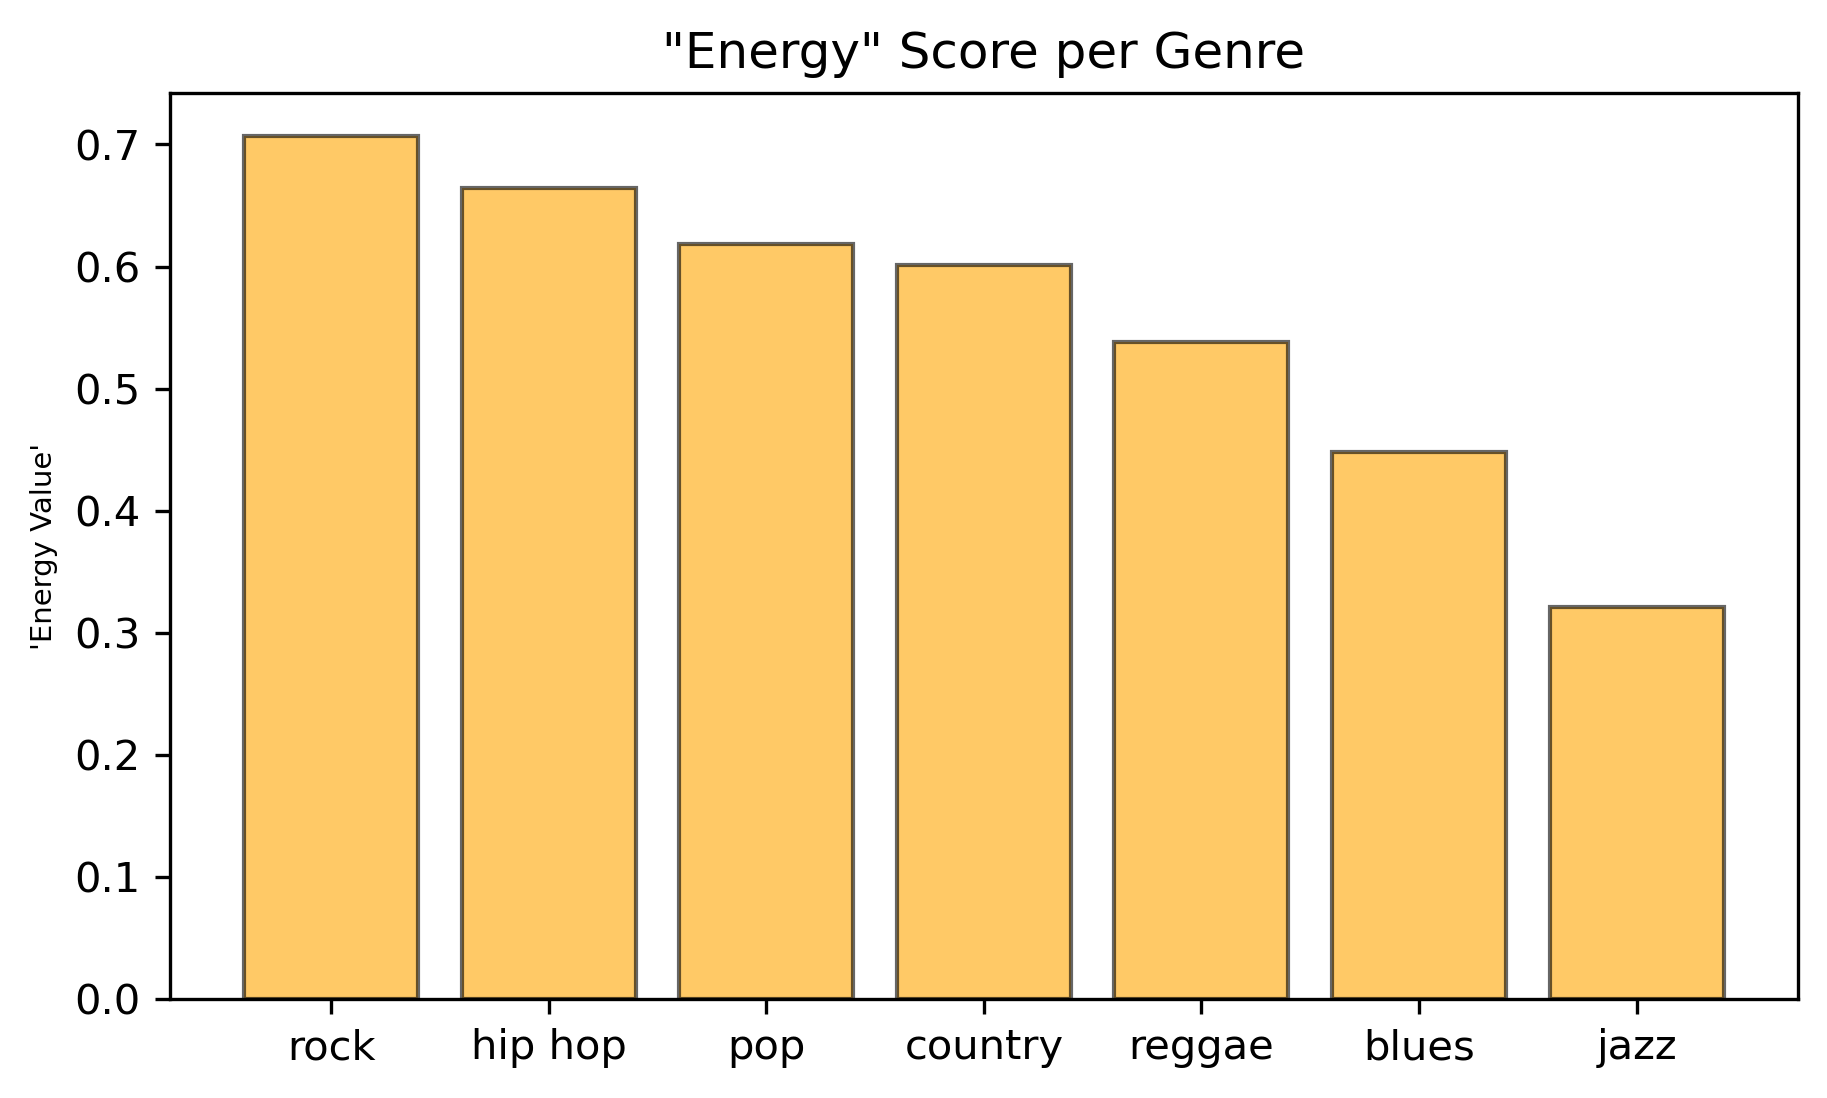

In [12]:
#plot how many songs in each genre

x = gen_attributes['genres'].to_numpy()
y = gen_attributes['energy'].to_numpy()

data = pd.DataFrame({'genre':x, 'energy':y}).sort_values('energy', ascending=False)

a = data['genre'].to_numpy()
b = data['energy'].to_numpy()

fig, ax = plt.subplots(figsize = (7,4), dpi=300)

ax.set_ylabel("'Energy Value'", fontsize=7)

ax.bar(a, b, color="orange", edgecolor='black', alpha=0.6)


plt.title('"Energy" Score per Genre')
plt.show();

In [13]:
#list of all genres

list_genre = gen_gen.genres.unique().tolist()
list_genre[:20]

#Too many subgenres

['432hz',
 '[]',
 'a cappella',
 'abstract',
 'abstract beats',
 'abstract hip hop',
 'accordeon',
 'accordion',
 'acid house',
 'acid jazz',
 'acid rock',
 'acid trance',
 'acousmatic',
 'acoustic blues',
 'acoustic pop',
 'acoustic punk',
 'adoracion',
 'adult standards',
 'adventista',
 'afghan pop']

## Best DF. Lyrics and Metadata on the same DF

In [4]:
ly = pd.read_csv('../data/1950_2019_with lyrics.csv')
ly.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
ly.columns

Index(['artist_name', 'track_name', 'release_date', 'genre', 'lyrics', 'len',
       'dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'like/girls', 'sadness', 'feelings', 'danceability', 'loudness',
       'acousticness', 'instrumentalness', 'valence', 'energy', 'topic',
       'age'],
      dtype='object')

In [16]:
#nly useful columns
cols = gen.columns.tolist()
cols =  ['artist_name', 'track_name', 'genre', 'release_date', 'lyrics']
lyrics = ly[cols]
lyrics.head()

artist_name            track_name genre  release_date  \
0  mukesh                mohabbat bhi jhoothi  pop   1950           
1  frankie laine         i believe             pop   1950           
2  johnnie ray           cry                   pop   1950           
3  pérez prado           patricia              pop   1950           
4  giorgos papadopoulos  apopse eida oneiro    pop   1950           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       lyrics  
0  hold time feel break feel untrue convince speak voice tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little turn dust play house ruin run leave save like chase train late late tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little run leave save like chase train know late late play break string feel heart want feel tell real truth hurt lie worse anymore little know little hold time feel  
1  believe drop rain fall grow believe darkest night candle glow believe go astray come believe believe believe smallest prayer hear believe great hear word time hear bear baby touch leaf believe believe believe lord heaven guide sin hide believe calvary die pierce believe death rise meet heaven loud amen know believe                                                                                                                                                                                                                
2  sweetheart send letter goodbye secret feel better wake dream think real false emotions feel heartaches hang long blue get bluer song remember cloudy hair                                                                                                                                                                                                                                                                                                                                                                                   
3  kiss lips want stroll charm mambo chacha meringue heaven arm japan brag geisha care long uncle eye starry sort gleam like million dollar dream come true everybody wish steal heart away guess try eye starry sort gleam like million dollar dream come true kiss lips want stroll charm japan brag geisha care long uncle                                                                                                                                                                                                                  
4  till darling till matter know till dream live apart know hearts till world free oceans cross mountains climb know gain loss pray loss time till dream till memory till hold till oceans cross mountains climb know gain loss pray loss time till dream till memory till hold till

In [17]:
genre = lyrics.genre.unique()
genre

array(['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop'],
      dtype=object)

In [18]:
#subsets per genre
hiphop = sort_by_genre(lyrics, 'hip hop')
rock = sort_by_genre(lyrics, 'rock')
country = sort_by_genre(lyrics, 'country')
blues = sort_by_genre(lyrics, 'blues')
jazz = sort_by_genre(lyrics, 'jazz')
reggae = sort_by_genre(lyrics, 'reggae')
pop = sort_by_genre(lyrics, 'pop')

In [19]:
hiphopwords= " ".join(hiphop['lyrics'])
rockwords= " ".join(rock['lyrics'])
blueswords= " ".join(blues['lyrics'])
countrywords= " ".join(country['lyrics'])
reggaewords= " ".join(reggae['lyrics'])
popwords= " ".join(pop['lyrics'])
jazzwords= " ".join(jazz['lyrics'])

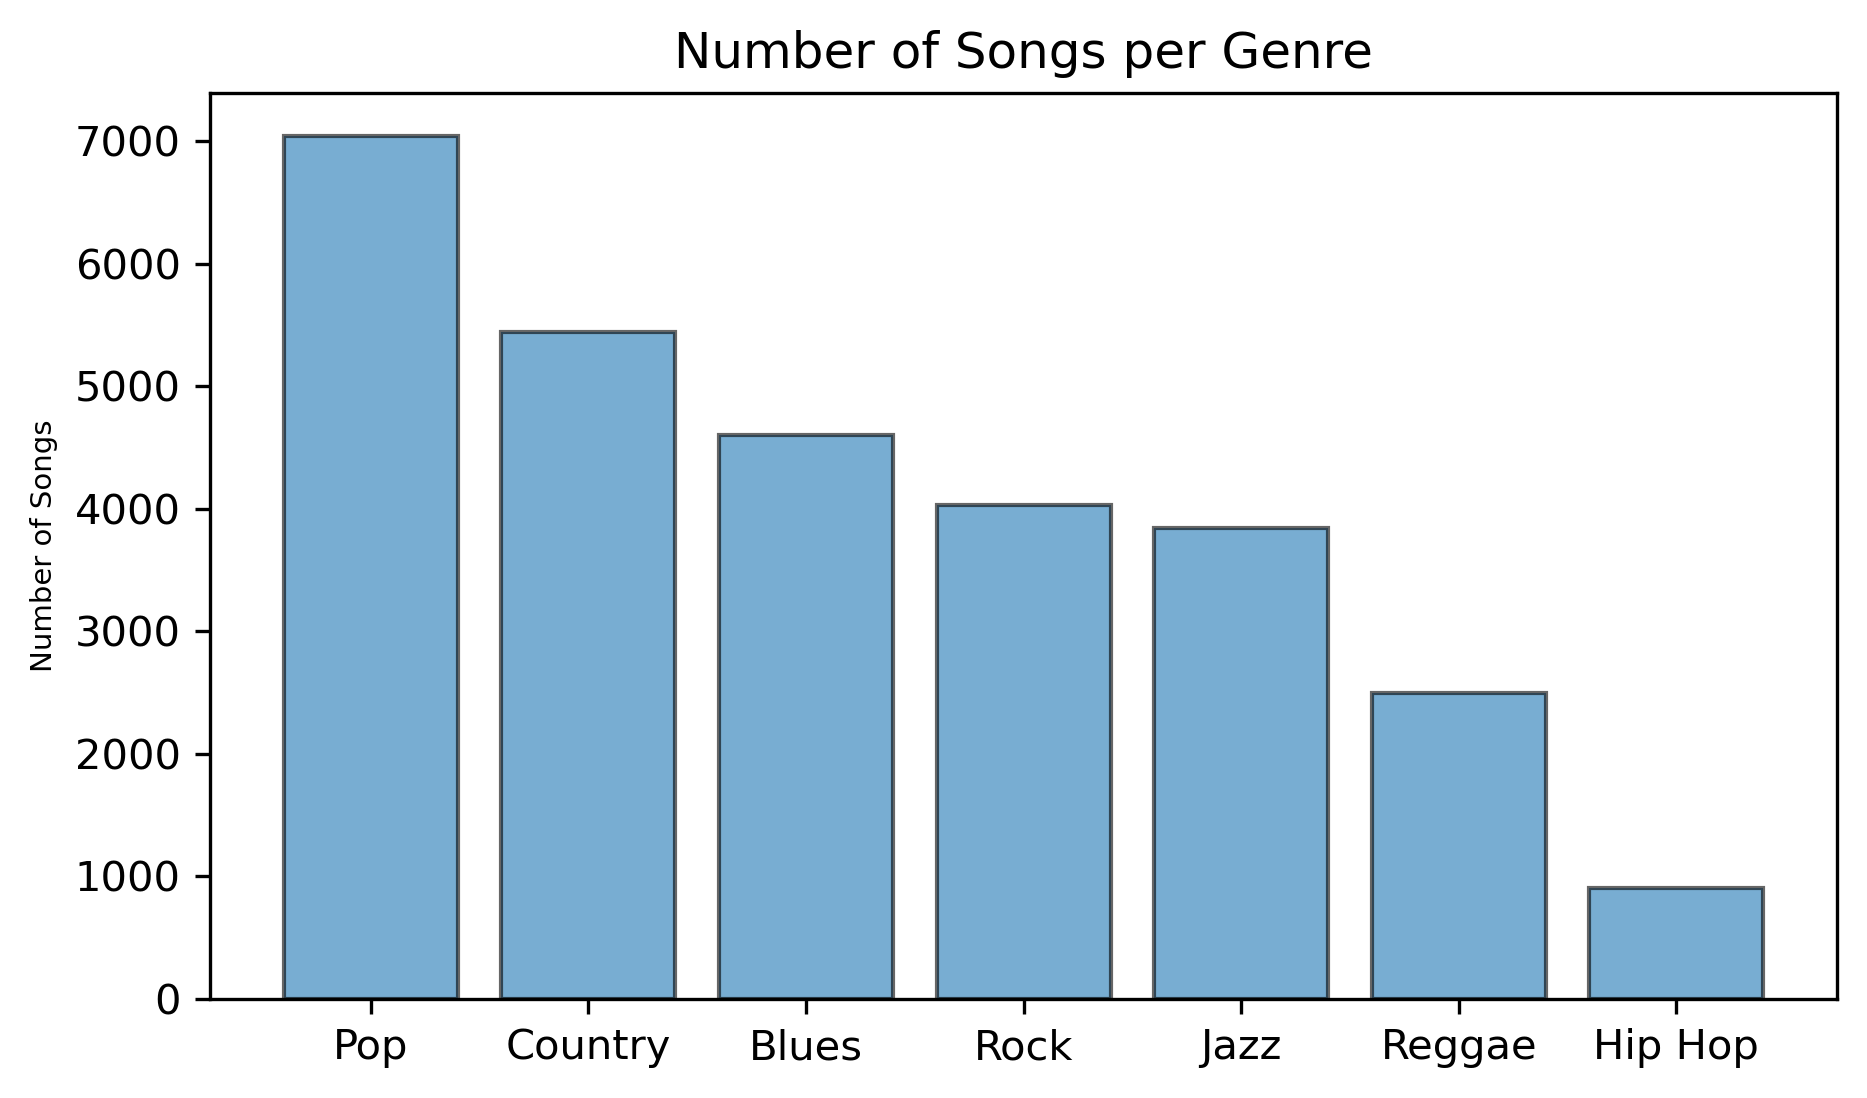

In [20]:
#plot how many songs in each genre

x = ['Hip Hop', 'Rock', 'Blues', 'Country', 'Reggae', 'Pop', 'Jazz']
y = [len(hiphop), len(rock), len(blues), len(country), len(reggae), len(pop), len(jazz)]

data = pd.DataFrame({'genre':x, '#_of_songs':y}).sort_values('#_of_songs', ascending=False)

a = data['genre'].values
b = data['#_of_songs'].values

fig, ax = plt.subplots(figsize = (7,4), dpi=300)

ax.set_ylabel("Number of Songs", fontsize=7)

ax.bar(a, b, edgecolor = 'black', alpha= 0.6)


plt.title('Number of Songs per Genre')
plt.show();

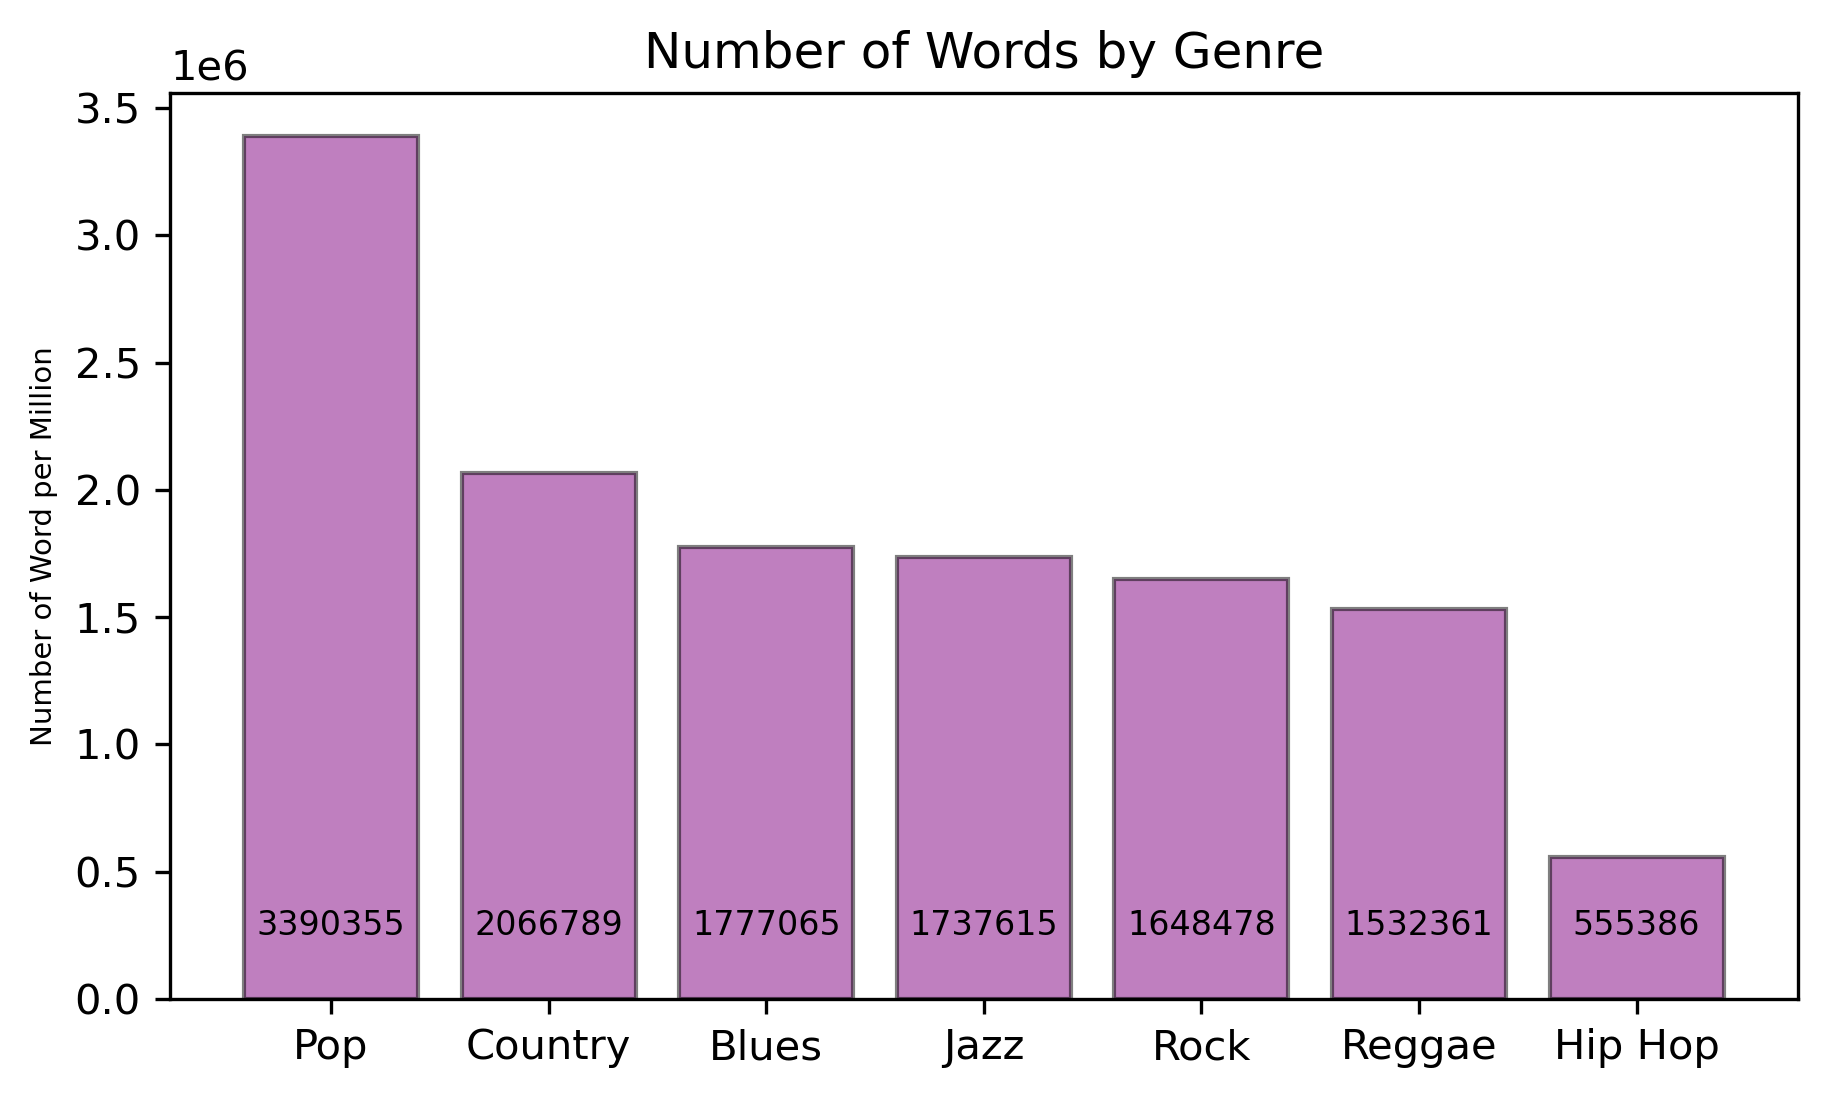

In [21]:
#plot how many songs in each genre
from matplotlib.ticker import FormatStrFormatter

x = ['Hip Hop', 'Rock', 'Blues', 'Country', 'Reggae', 'Pop', 'Jazz']
y = [len(hiphopwords), len(rockwords), len(blueswords), len(countrywords), len(reggaewords),
     len(popwords), len(jazzwords)]

data = pd.DataFrame({'genre':x, '#_of_words':y}).sort_values('#_of_words', ascending=False)

a = data['genre'].values
b = data['#_of_words'].values

fig, ax = plt.subplots(figsize = (7,4), dpi=300)

ax.bar(a, b, color='purple', edgecolor = 'black', alpha= 0.5)

ax.set_ylabel("Number of Word per Million", fontsize=7)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.title('Number of Words by Genre')

total = sorted(y, reverse=True)
for i, v in enumerate(total):
    ax.text(i, 
              v/total[i]+(2.5*100000), 
              total[i], 
              fontsize=8, 
              color='black', horizontalalignment='center')
    
plt.show();
# fig.savefig('images/wordspergen.png', format='png')

In [22]:
data.reset_index().drop('index', axis=1)

genre  #_of_words
0  Pop      3390355   
1  Country  2066789   
2  Blues    1777065   
3  Jazz     1737615   
4  Rock     1648478   
5  Reggae   1532361   
6  Hip Hop  555386

## Count Vectorizer top 500

In [23]:
#Panda dataset Genre: all words in all lyrics
rock_lyrics = lyrics_to_genre(sort_by_genre(lyrics, 'rock'), 'rock')
hiphop_lyrics = lyrics_to_genre(sort_by_genre(lyrics, 'hip hop'), 'hip hop')
pop_lyrics = lyrics_to_genre(sort_by_genre(lyrics, 'pop'), 'pop')
reggae_lyrics = lyrics_to_genre(sort_by_genre(lyrics, 'reggae'), 'reggae')
jazz_lyrics = lyrics_to_genre(sort_by_genre(lyrics, 'jazz'), 'jazz')
country_lyrics = lyrics_to_genre(sort_by_genre(lyrics, 'country'), 'country')
blues_lyrics = lyrics_to_genre(sort_by_genre(lyrics, 'blues'), 'blues')

#Panda dataset Genre: top_500_words in all lyrics
top_20_rock = top_500_features(countvec(rock_lyrics), count_vectorizer)
top_20_hiphop = top_500_features(countvec(hiphop_lyrics), count_vectorizer)
top_20_pop = top_500_features(countvec(pop_lyrics), count_vectorizer)
top_20_reggae = top_500_features(countvec(reggae_lyrics), count_vectorizer)
top_20_jazz = top_500_features(countvec(jazz_lyrics), count_vectorizer)
top_20_country = top_500_features(countvec(country_lyrics), count_vectorizer)
top_20_blues = top_500_features(countvec(blues_lyrics), count_vectorizer)

In [24]:
top_500 = pd.DataFrame({'genre':[col.lower().replace(' ', '_') for col in x], 
                       'top_500_words':[top_20_hiphop, top_20_rock, top_20_blues, 
                                       top_20_country, top_20_reggae, top_20_pop, top_20_jazz]})

## Tf Idf Vectorizer top 20

In [25]:
target_names = ['rock', 'hiphop', 'pop', 'reggae', 'jazz', 'country', 'blues']

td = pd.concat([rock_lyrics, hiphop_lyrics,pop_lyrics,reggae_lyrics,jazz_lyrics,
                country_lyrics,blues_lyrics], axis=0)

top = tfidf_top_features(tfidf(td), 20)

top_20 = pd.DataFrame({'genre':target_names, 
                       'top_20_words': top})

In [ ]:
target_names = ['rock', 'hiphop', 'pop', 'reggae', 'jazz', 'country', 'blues']

my_stop_words = my_stop_words.union(['feel','away','heart','right','live', 
                                     'long','life', 'want', 'leave','night', 'eye'])

tfidf_vectorizer = TfidfVectorizer(stop_words=my_stop_words, max_features=7000)

def tfidf(df, text = 'lyrics'):
    X = tfidf_vectorizer.fit_transform(df[text])
    return X

def tfidf_top_features(X, num):
    
    features = tfidf_vectorizer.get_feature_names()
    top_10_words = X.toarray().argsort()[:,-1:-(num+1):-1]

    f = []

    for num, word in enumerate(top_10_words):
        f.append({', '.join(features[i] for i in word)})
    return f

top = tfidf_top_features(tfidf(td), 20)

top_20 = pd.DataFrame({'genre':target_names, 
                       'top_20_words': top})

top_20

### WordCloud

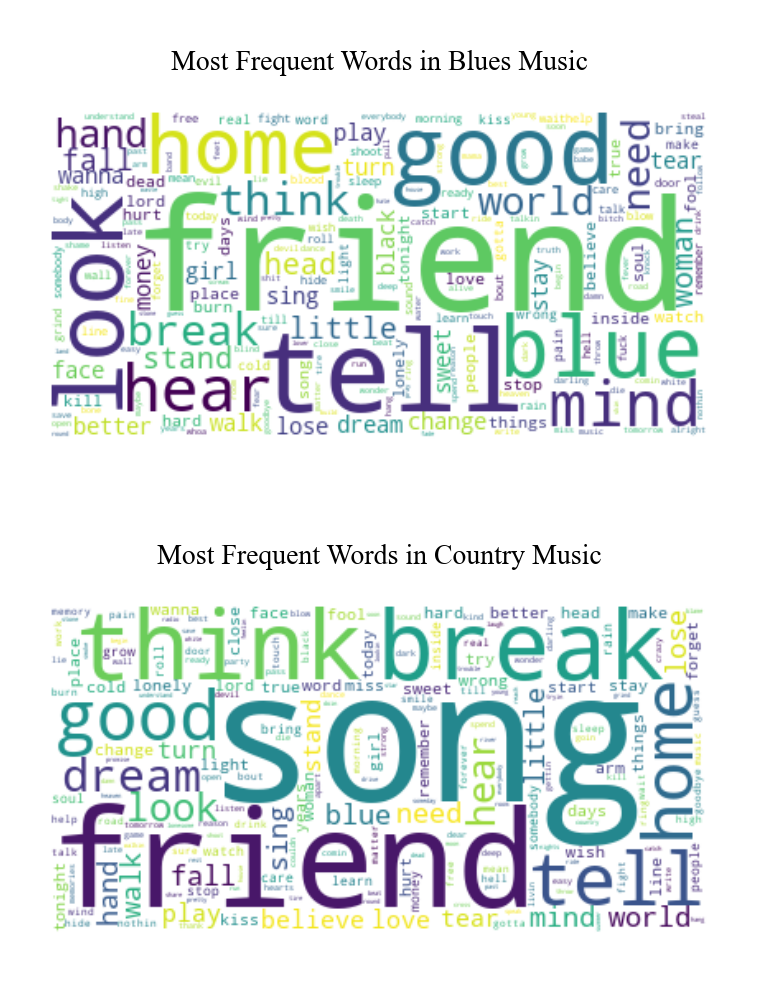

In [27]:
top_200_tfidf = tfidf_top_features(tfidf(td), 200)

top_200 = pd.DataFrame({'genre':target_names, 
                       'top_200_words': top_200_tfidf})


from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(
    background_color='white',
    max_words=2000)

word_cloud = top_200['top_200_words'][6]
string = ""
word_cloud_country = (' ').join(word_cloud)
wc.generate(word_cloud_country)

wc2 = WordCloud(
    background_color='white',
    max_words=2000)

word_cloud = top_200['top_200_words'][5]
string = ""
word_cloud_country = (' ').join(word_cloud)
wc2.generate(word_cloud_country)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(1.7,2.4), dpi=500)

ax1.imshow(wc, interpolation='bilinear')
ax1.set_title('Most Frequent Words in Blues Music',fontname='Times New Roman', fontsize=4)

ax2.imshow(wc2, interpolation='bilinear')
ax2.set_title("Most Frequent Words in Country Music", fontname='Times New Roman', fontsize=4)

ax1.axis('off')
ax2.axis('off')
plt.show();

In [28]:
b = top_200['top_200_words'][6]#blues
b = " ".join(b)
c = top_200['top_200_words'][5]#country
c = " ".join(c)

In [29]:
import spacy

col = ['token', 'pos']
nlp = spacy.load("en_core_web_sm")
nlp.Defaults.stop_words |= {my_stop_words}

nlp.max_length = 2000000
doc = nlp(b)
doc2=nlp(c)

val = []
for token in doc:
    val.append([token.lemma_, token.pos_])

val2 = []
for token in doc2:
    val2.append([token.lemma_, token.pos_])
    
blues_spacy = pd.DataFrame(val, columns = col)
country_spacy = pd.DataFrame(val2, columns = col)


blues_noun = blues_spacy.loc[blues_spacy['pos']=='NOUN']
blues_verb = blues_spacy.loc[blues_spacy['pos']=='VERB']

country_noun = country_spacy.loc[country_spacy['pos']=='NOUN']

print(country_noun.head(10), '\n', blues_noun.head(10))

    token   pos
8   home   NOUN
10  dream  NOUN
16  world  NOUN
22  mind   NOUN
36  play   NOUN
38  love   NOUN
40  tear   NOUN
42  song   NOUN
54  girl   NOUN
60  thing  NOUN 
     token   pos
8   home   NOUN
16  break  NOUN
18  world  NOUN
26  woman  NOUN
30  head   NOUN
42  walk   NOUN
46  play   NOUN
48  dream  NOUN
50  girl   NOUN
62  money  NOUN


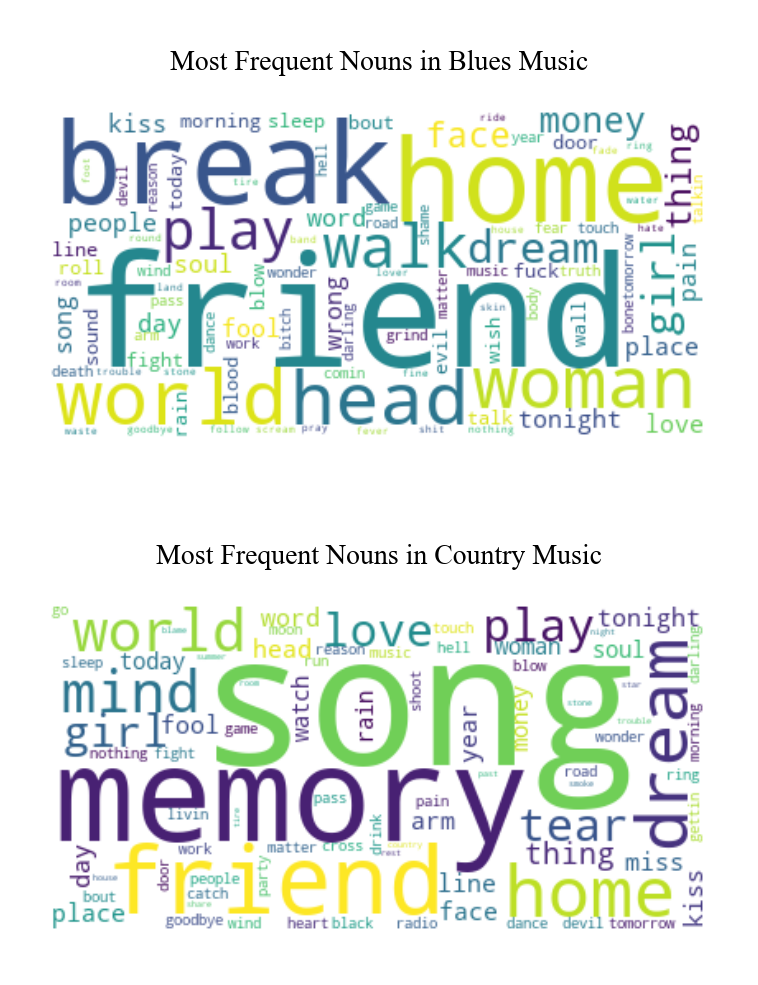

In [30]:
wc = WordCloud(
    background_color='white',
    max_words=2000)

word_cloud = blues_noun['token']
string = ""
word_cloud_blues = (' ').join(word_cloud)
wc.generate(word_cloud_blues)

wc2 = WordCloud(
    background_color='white',
    max_words=2000)

word_cloud = country_noun['token']
string = ""
word_cloud_country = (' ').join(word_cloud)
wc2.generate(word_cloud_country)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(1.7,2.4), dpi=500)

ax1.imshow(wc, interpolation='bilinear')
ax1.set_title('Most Frequent Nouns in Blues Music',fontname='Times New Roman', fontsize=4)

ax2.imshow(wc2, interpolation='bilinear')
ax2.set_title("Most Frequent Nouns in Country Music", fontname='Times New Roman', fontsize=4)

ax1.axis('off')
ax2.axis('off')
plt.show();

# fig.savefig('images/noun_cloud.png')

## Creating KNN


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

genre_lyrics= lyrics.drop(['artist_name', 'track_name', 'release_date'], axis=1)
track_names = lyrics['track_name']
artist_names = lyrics['artist_name']

len(genre_lyrics)

28372

In [32]:
import scipy as sp
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from scipy.stats import norm


tfidf_lyrics = tfidf(genre_lyrics).toarray()
genre = genre_lyrics.genre.values

# fig, ax = plt.subplots(figsize = (7,4), dpi=100)

# ax.plot(lyrics, genre, 'ro')
# ax.scatter(200,2)
# ax.set_xlim([0,1])
# ax.set_ylim([0,1])
# plt.title("Genre vs Vectorized Lyrics")
# ax.set_xlabel("Vectorized Lyrics (TfIdf)")
# ax.set_ylabel("Genre")
# plt.show()
ly.genre.unique()


array(['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop'],
      dtype=object)

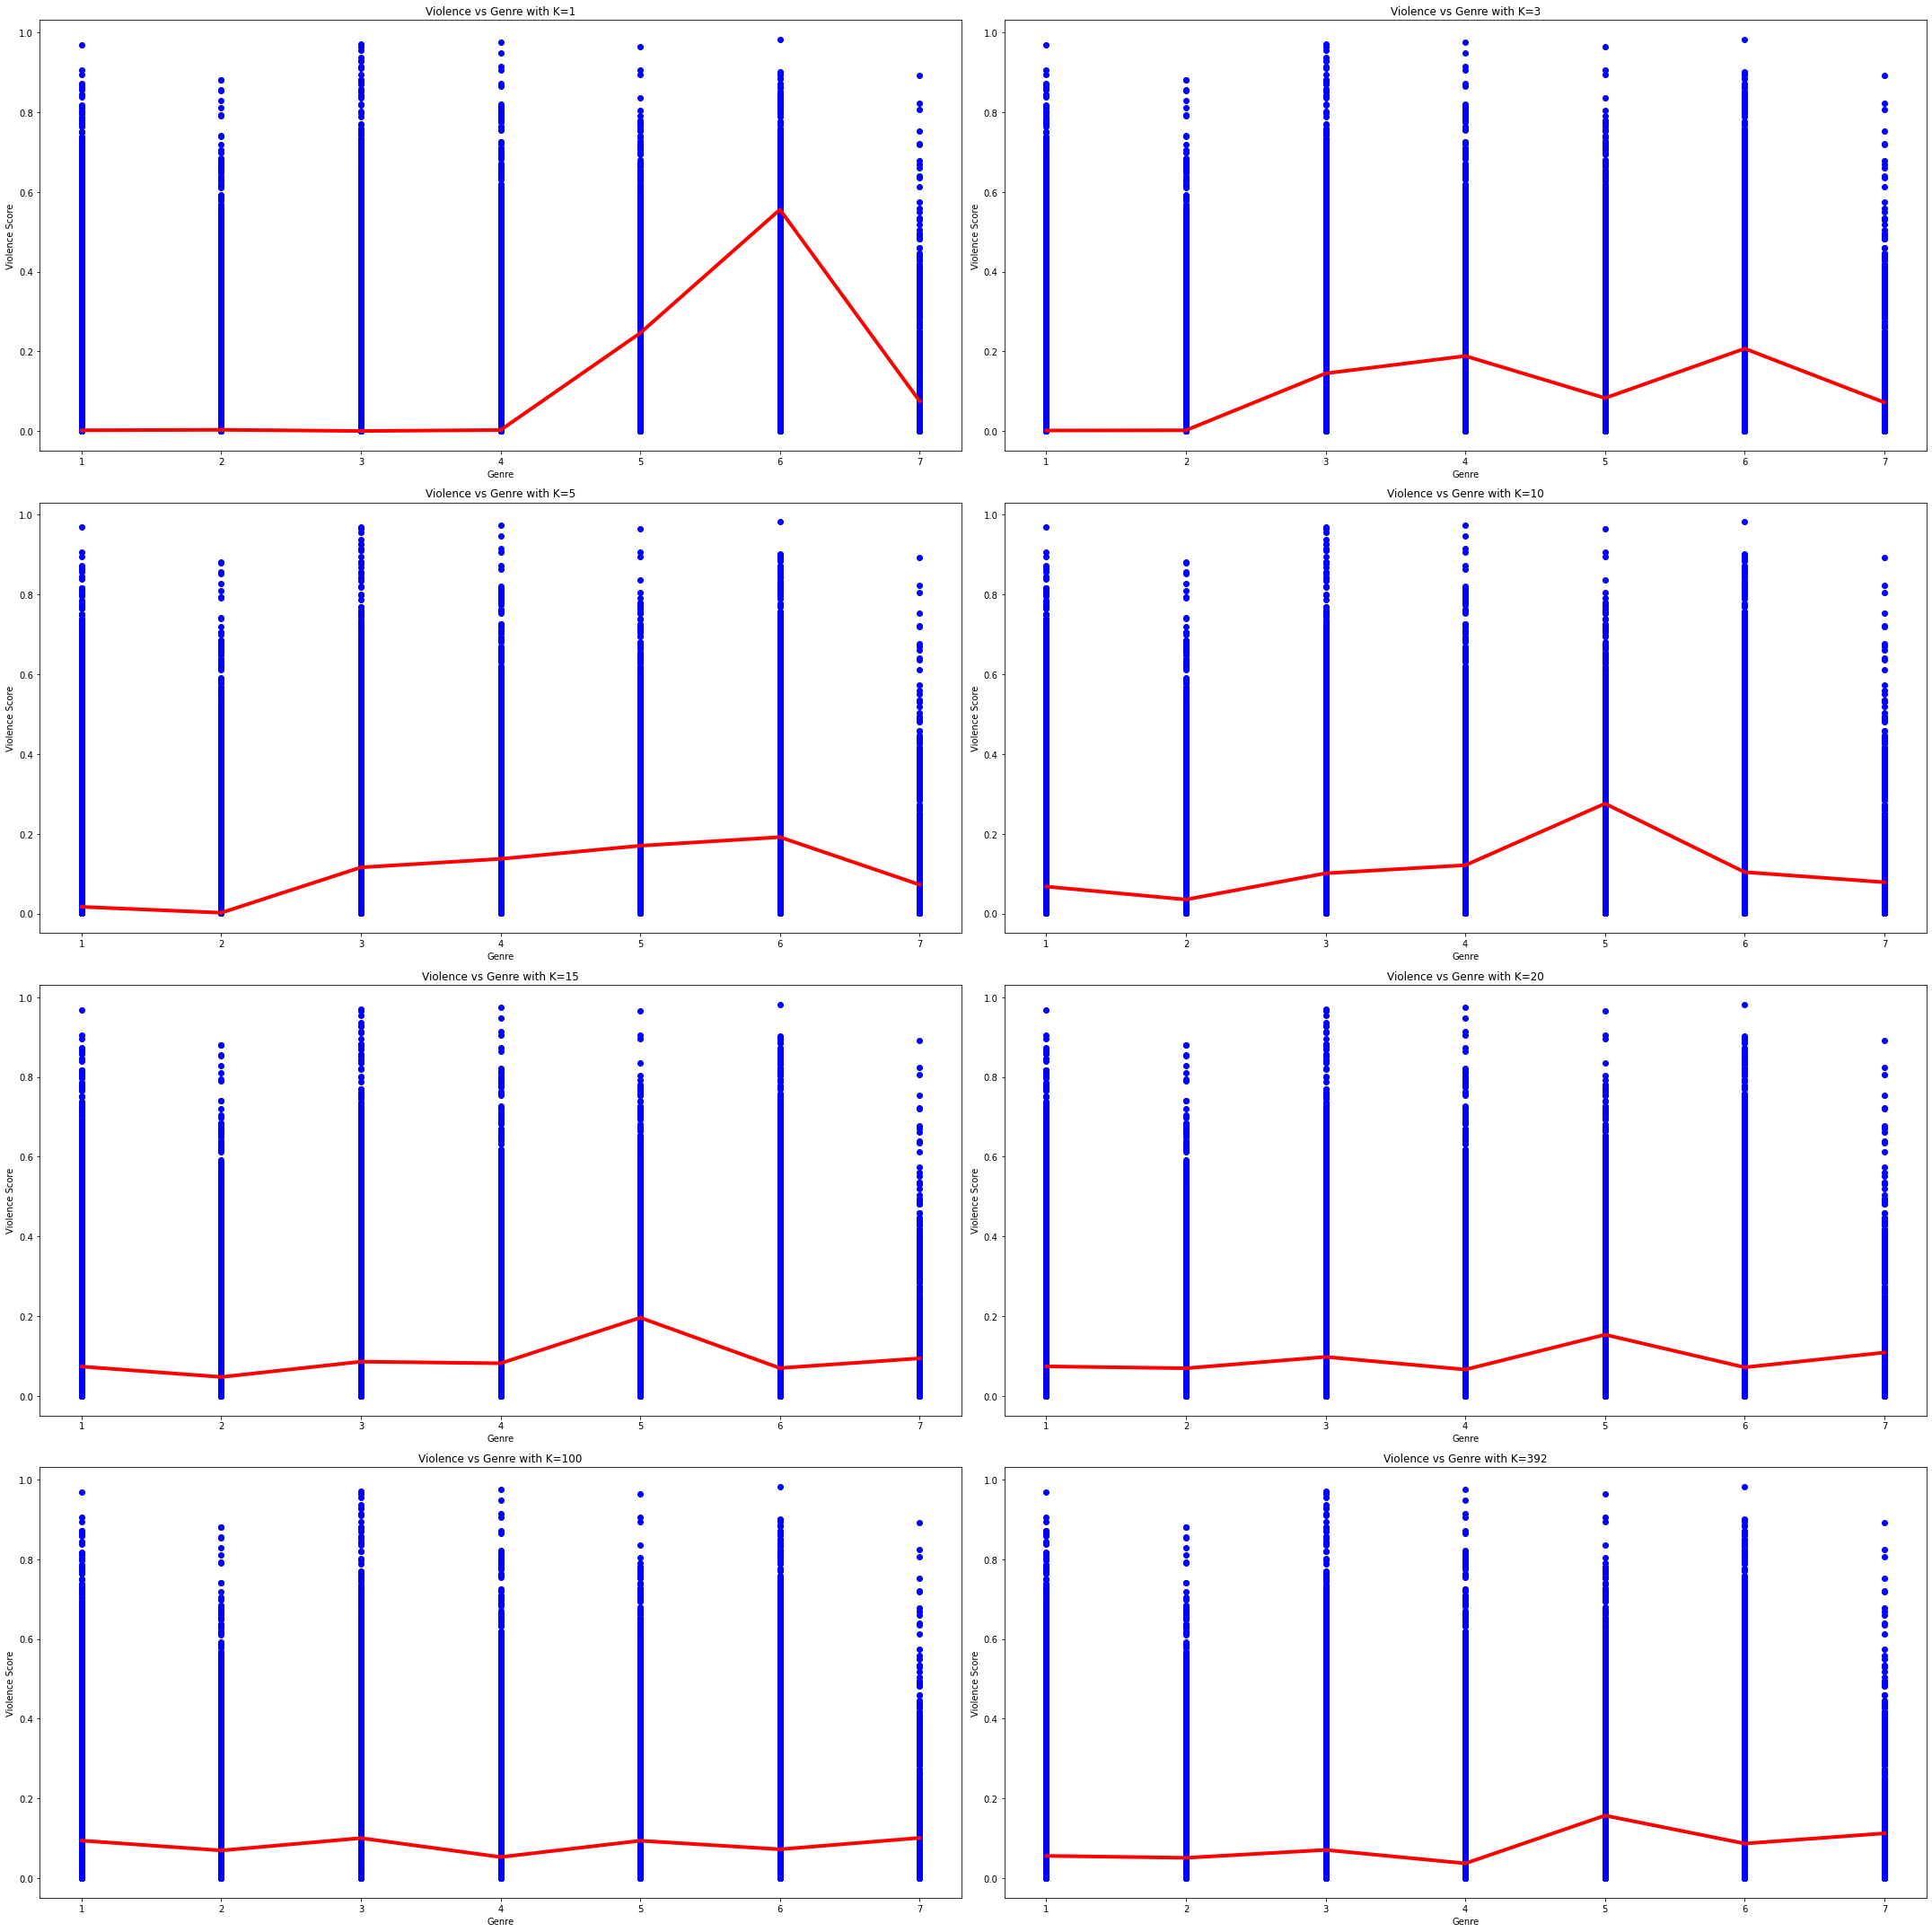

In [33]:
X = ly.replace({'pop':1, 'country':2, 'blues':3, 'jazz':4, 'reggae':5,
               'rock': 6, 'hip hop': 7}, inplace=True)

X = ly.genre.values
y = ly.violence.values

# X_train, X_test, y_train, y_test = train_test_split(X, y, 
# test_size=0.25, random_state=0)


fig, axs = plt.subplots(4,2,figsize=(30, 30))
x_tick = np.linspace(0, 6)
y_tick = np.linspace(0, 1)

k_num = [1, 3, 5, 10, 15, 20, 100, 392]

for k, ax in zip(k_num,axs.flatten()):

    model = KNeighborsRegressor(k)
    model.fit(X.reshape(-1,1), y)
    prediction = model.predict(X.reshape(-1,1))

    ax.scatter(X,y,c='blue')
    ax.plot(X, model.predict(X.reshape(-1,1)), linewidth=4, color='red')
    ax.set_xlabel('Genre')
    ax.set_ylabel('Violence Score')
#     ax.set_yticks(y_tick)
    ax.set_title('Violence vs Genre with K={}'.format(k))

fig.tight_layout()

TypeError: only integer scalar arrays can be converted to a scalar index

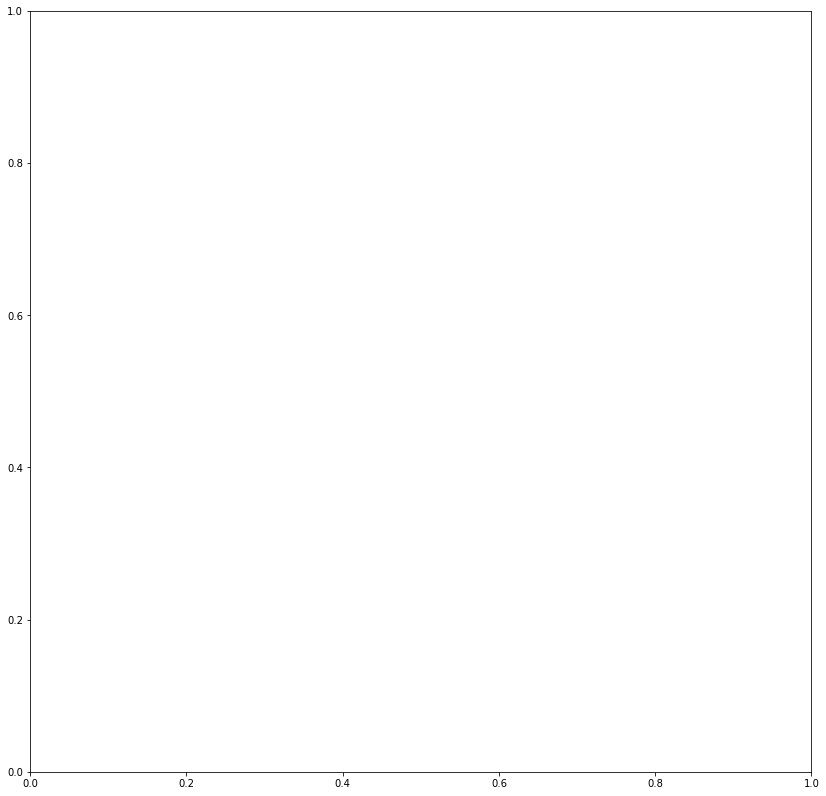

In [10]:
fig, ax = plt.subplots(figsize=(14, 14))

x=ly.loc[ly['genre']=='rock'].energy.values[:100]

ax.plot(range(len(x)), ,c='blue')

plt.show()

In [35]:
from sklearn.cluster import KMeans

X_train, X_test, y_train, y_test = train_test_split(X,y)

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train.reshape(-1,1), y_train)
prediction = model.predict(X_train.reshape(-1,1))

model.score(prediction.reshape(-1,1), y_train)

-0.28476311154072165

In [36]:
genre_lyrics.head()

genre  \
0  pop    
1  pop    
2  pop    
3  pop    
4  pop    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       lyrics  
0  hold time feel break feel untrue convince speak voice tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little turn dust play house ruin run leave save like chase train late late tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little run leave save like chase train know late late play break string feel heart want feel tell real truth hurt lie worse anymore little know little hold time feel  
1  believe drop rain fall grow believe darkest night candle glow believe go astray come believe believe believe smallest prayer hear believe great hear word time hear bear baby touch leaf believe believe believe lord heaven guide sin hide believe calvary die pierce believe death rise meet heaven loud amen know believe                                                                                                                                                                                                                
2  sweetheart send letter goodbye secret feel better wake dream think real false emotions feel heartaches hang long blue get bluer song remember cloudy hair                                                                                                                                                                                                                                                                                                                                                                                   
3  kiss lips want stroll charm mambo chacha meringue heaven arm japan brag geisha care long uncle eye starry sort gleam like million dollar dream come true everybody wish steal heart away guess try eye starry sort gleam like million dollar dream come true kiss lips want stroll charm japan brag geisha care long uncle                                                                                                                                                                                                                  
4  till darling till matter know till dream live apart know hearts till world free oceans cross mountains climb know gain loss pray loss time till dream till memory till hold till oceans cross mountains climb know gain loss pray loss time till dream till memory till hold till

In [37]:
num_top_words = 15
X = tfidf(genre_lyrics)

tf_feature_names = tfidf_top_features(X, num_top_words) #theses are the words in our bag of words


model = KMeans(n_clusters=5, random_state=0)
prediction = model.fit_predict(X)

def display_topics(feature_names, num_top_words):
    for topic_idx, topic in enumerate(tf_feature_names):
        print("Song %d Topic:" % (topic_idx))
        print(" ".join(topic))
              
display_topics(tf_feature_names, num_top_words).topandas()

Song 0 Topic:
hurt, worse, late, string, anymore, try, play, little, truth, chase, lie, break, real, forgive, okay
Song 1 Topic:
believe, heaven, calvary, hear, smallest, pierce, amen, leaf, astray, darkest, candle, sin, prayer, glow, guide
Song 2 Topic:
bluer, cloudy, emotions, false, heartaches, sweetheart, secret, letter, wake, hair, send, goodbye, hang, remember, real
Song 3 Topic:
japan, starry, brag, gleam, stroll, sort, uncle, charm, dollar, million, mambo, lips, care, kiss, true
Song 4 Topic:
till, loss, oceans, mountains, gain, climb, memory, cross, dream, pray, hearts, darling, apart, matter, free
Song 5 Topic:
run, silent, final, warriors, nightmare, deep, prayer, sleep, secret, alight, hatch, cunning, lethal, dead, rehearse
Song 6 Topic:
think, single, exist, feelin, reason, begin, tell, mean, care, moment, mindin, world, spend, endure, knowin
Song 7 Topic:
glow, share, meet, speak, pass, grow, press, lips, moment, fast, heaven, care, dream, break, forevermore
Song 8 Topic:

Song 612 Topic:
quest, fight, unbearable, reach, matter, afar, scorn, glorious, ounce, strive, pause, hopeless, courage, peaceful, impossible
Song 613 Topic:
runnin, scar, afraid, feelin, choose, sure, place, stand, walk, head, turn, lose, break, forehead, foreign
Song 614 Topic:
darlin, heavenly, touch, tenderly, tease, squeeze, treat, miss, beat, close, kiss, think, tell, forbid, force
Song 615 Topic:
letter, sand, ache, break, wave, tide, laugh, write, pass, today, true, mean, footsteps, footprints, foreign
Song 616 Topic:
limbo, clock, quick, lower, stick, whirl, girl, knee, chick, spread, bend, tree, moon, feet, beat
Song 617 Topic:
fix, lord, funny, believe, die, children, mind, yonder, rise, hate, head, bury, kind, grind, walk
Song 618 Topic:
crowd, prom, hideaway, dance, game, hurry, pretend, loud, sight, steal, crazy, apart, guess, tonight, remember
Song 619 Topic:
putty, rubber, size, cruel, refuse, hand, babe, jump, treat, ball, nothin, straight, fool, gladly, obey
Song 620 

Song 862 Topic:
hurt, ohhhh, make, beggin, pin, stand, stay, needle, okay, tell, goin, love, people, walk, look
Song 863 Topic:
lovely, fine, walkin, plan, morning, laughin, stand, moonlight, garden, complete, steady, silver, later, book, corner
Song 864 Topic:
gurdy, hurdy, sing, songs, truth, beatles, vast, sleep, awaken, humanity, age, demand, peep, gaze, eternity
Song 865 Topic:
grit, gut, nut, boys, afraid, teeth, wave, feet, wipe, guy, gotta, shout, little, girls, crest
Song 866 Topic:
toy, tempt, tiny, chair, thrill, window, sight, house, late, cold, light, stay, little, tell, forever
Song 867 Topic:
fall, doom, fool, bird, awake, rain, beat, tell, sing, fore, break, fail, crazy, foreigner, force
Song 868 Topic:
good, ideal, explore, heartaches, honest, unknown, sadness, hello, romance, fake, learn, hide, free, remember, kiss
Song 869 Topic:
dollars, money, short, hard, million, girl, plenty, babe, forbid, force, fore, foreign, forecast, footsteps, forehead
Song 870 Topic:
prete

pawn, home, whistle, lonesome, train, tomorrow, hate, run, blow, hear, letter, chain, track, read, gold
Song 1362 Topic:
follow, remove, closer, prove, letter, bring, pretend, doubt, trust, need, unto, replace, iron, satisfy, river
Song 1363 Topic:
listen, band, louder, play, drum, woman, weren, help, song, little, fall, need, tell, good, think
Song 1364 Topic:
soul, look, fair, thousand, bosom, drummer, hard, march, naked, company, hand, instrumental, rid, drum, freeze
Song 1365 Topic:
easy, natural, flower, hours, send, spend, tent, kite, high, rent, hand, sigh, let, think, window
Song 1366 Topic:
yeahyeah, dream, lover, girl, true, till, sleep, plea, charm, magic, someday, near, pray, arm, grow
Song 1367 Topic:
girl, blind, open, opportunity, stay, mind, dare, strength, wouldn, felt, afraid, share, lord, today, care
Song 1368 Topic:
fall, chain, remind, bind, sorrow, tomorrow, pain, burst, bubble, dont, phone, trouble, catch, lie, kiss
Song 1369 Topic:
child, exist, spin, awake, sma

blackmail, funny, money, dirty, think, cassette, render, divorce, ground, provide, basement, service, bathroom, nervous, holler
Song 1862 Topic:
easy, harder, believe, realize, make, hard, solo, laughter, stare, guitar, ways, different, kind, hide, love
Song 1863 Topic:
fall, lord, help, believe, bible, awhile, book, style, chain, wear, feet, roof, cell, good, bar
Song 1864 Topic:
plenty, count, individual, today, invitation, things, lot, join, bridge, worry, party, reason, maybe, everybody, wonder
Song 1865 Topic:
alive, defenses, fence, break, crawl, ask, build, world, wall, measure, comfort, lesson, someday, fine, feet
Song 1866 Topic:
reality, upstairs, hard, true, bizarre, millionaire, likely, direct, loser, sleeve, quickly, important, afford, easily, deceive
Song 1867 Topic:
human, act, obscene, riff, head, unknown, machine, scene, ahead, babe, things, dream, generate, hang, liable
Song 1868 Topic:
prophets, bait, rely, childhood, deep, course, wise, fate, power, end, speak, look

Song 2361 Topic:
cool, spell, firmly, read, course, foot, pack, wanna, rhyme, mouth, federal, pout, award, fool, louder
Song 2362 Topic:
airport, plane, baggage, face, smile, place, gateway, runaway, destination, trace, believe, faster, turn, stronger, food
Song 2363 Topic:
zone, slide, steppin, stand, fall, suddenly, clear, ride, begin, limousine, glide, apple, head, face, stream
Song 2364 Topic:
reel, send, prevent, slot, reverie, meaningless, unravel, breakdown, result, reaction, total, bond, knot, nerve, defeat
Song 2365 Topic:
conversation, complex, photo, regular, intentions, reflection, gods, distant, claim, force, mirror, boys, picture, easy, strong
Song 2366 Topic:
world, butcher, fatal, gift, doors, flesh, open, globe, close, love, eternal, sacred, mind, holy, home
Song 2367 Topic:
believe, drive, apart, sustain, renew, pursue, forsake, frown, turn, mind, laughter, drift, disappear, winter, thousand
Song 2368 Topic:
animals, begin, animal, grass, wasn, think, hooves, paw, cur

Song 2861 Topic:
tell, early, buy, school, phone, mother, ring, help, forgettin, forget, fork, forgiveness, footprints, footsteps, forbid
Song 2862 Topic:
creep, taunt, toast, wanna, silent, grave, streets, fear, hide, sleep, tear, force, zoom, forbid, forecast
Song 2863 Topic:
surrender, maybe, someday, remember, pray, room, help, fact, walk, lose, kindest, shrug, matter, friends, wish
Song 2864 Topic:
space, fair, relationship, listen, care, sign, fine, tonight, close, better, flyest, forfeit, flutter, forecast, forehead
Song 2865 Topic:
carousel, circus, lose, girl, piece, popcorn, instant, pony, dancer, imagination, chance, dime, clown, recall, world
Song 2866 Topic:
unconditional, kind, deserve, everlasting, return, obey, tear, learn, true, pray, transcend, shiny, word, bright, mistake
Song 2867 Topic:
repeat, bear, commotion, stillness, lonely, sound, address, supply, sudden, border, defend, heavens, colder, emotion, fold
Song 2868 Topic:
message, secret, atmosphere, endlessly, w

lonely, place, little, bear, apart, die, love, depend, strangers, shatter, suddenly, break, longer, bright, yesterday
Song 3236 Topic:
sympathy, overflow, fall, open, beautiful, yesterday, couple, hearts, door, remember, forgive, foreign, football, footprints, footsteps
Song 3237 Topic:
tonight, anew, astray, completely, streets, fighters, begin, atmosphere, risk, step, gift, lovers, belong, lose, share
Song 3238 Topic:
fine, line, half, decision, split, choose, crutch, fuse, confidence, real, decide, think, hide, light, clue
Song 3239 Topic:
hear, voice, wanna, listen, close, near, clear, help, uncertainty, wind, jury, talk, tangle, rattle, clearly
Song 3240 Topic:
pretend, chin, late, run, look, smile, tear, start, fall, need, footprints, footsteps, forbid, force, fore
Song 3241 Topic:
surrender, wrong, swear, choose, tell, hug, realise, believe, belt, content, bible, eternity, fall, middle, safe
Song 3242 Topic:
misery, forecast, thousand, weather, open, smile, spoil, better, couldn

month, fish, police, ocean, number, space, memory, mother, tonight, blue, head, tell, forever, force, fore
Song 3611 Topic:
wonder, home, able, hurry, set, weep, mountain, songs, memory, reach, past, fool, work, sleep, remember
Song 3612 Topic:
whoa, rooftop, remember, stop, couldn, complicate, tight, lead, busy, kiss, moon, sow, deliver, dime, dream
Song 3613 Topic:
song, bring, worship, require, sorry, look, lord, deeper, appear, search, express, things, simply, strip, endless
Song 3614 Topic:
disregard, regard, government, honest, relief, president, receive, hard, think, work, everyday, city, die, discard, guess
Song 3615 Topic:
road, save, soul, noon, hard, desperate, things, spin, moon, round, maybe, guess, care, try, girl
Song 3616 Topic:
pity, forget, shame, anymore, hearts, pain, surround, beauty, break, explain, think, people, tear, things, foresee
Song 3617 Topic:
better, best, rest, simply, stick, hang, apart, dead, word, tear, wild, language, start, lose, wash
Song 3618 Top

Song 4110 Topic:
clap, phife, rhyme, sucker, scratch, beat, favorite, shit, brothers, shut, peace, kick, russia, hand, world
Song 4111 Topic:
change, write, longer, constant, common, child, complications, desperation, greater, alive, soul, push, dream, ponder, keepin
Song 4112 Topic:
shut, mouth, wanna, change, world, spin, start, minute, cynical, petty, deeply, loan, stayin, government, player
Song 4113 Topic:
madly, soul, kiss, thrill, steal, overboard, adore, gladly, mist, tumble, embrace, beg, magic, fell, control
Song 4114 Topic:
creep, wanna, make, chase, hoe, damn, verdict, room, bitch, muthafuckin, pathetic, planets, sweater, necessary, door
Song 4115 Topic:
seal, kiss, summer, letter, send, emptiness, darling, goodbye, lonely, cold, pledge, september, tenderly, sunlight, meet
Song 4116 Topic:
quiet, ashamed, mess, sleep, forget, helpless, metal, awful, silent, snow, cover, boys, trust, bone, easy
Song 4117 Topic:
hearted, savior, flicker, forget, wrong, bring, heavens, dinner,

Song 4610 Topic:
sail, everythin, howlin, spinnin, disappear, sky, winter, wild, taste, dear, darling, crazy, round, commercial, lyric
Song 4611 Topic:
status, victory, work, lay, mistake, puttin, wait, watch, gators, instantly, versus, veteran, blazin, nonsense, gravy
Song 4612 Topic:
damn, wham, young, trap, club, talkin, outdoors, lull, moment, fine, leanin, stallion, syrup, ambulance, situations
Song 4613 Topic:
prayer, guide, safe, place, child, lead, pray, amor, soul, watch, wise, shadow, hearts, kind, star
Song 4614 Topic:
promise, ocean, hero, cross, strength, moon, bring, need, anytime, mountain, light, arm, oooooh, fortress, ooooh
Song 4615 Topic:
bitch, junk, cheese, sleeves, roll, anybody, flow, lemme, talk, flame, shoot, burn, whatcha, skills, look
Song 4616 Topic:
stay, awhile, roll, waste, make, taste, good, begin, splash, kiss, chin, moonlight, lick, later, sweat
Song 4617 Topic:
thank, bout, elusive, dangle, consequence, terror, enjoy, eat, forgive, silence, finally, b

jump, taste, arm, kiss, oooo, touch, farther, hotter, excite, wrap, tell, alive, heaven, woman, tonight
Song 5110 Topic:
apart, inside, deep, start, hard, need, travel, begin, grow, hide, believe, bring, world, look, fresh
Song 5111 Topic:
control, apart, fall, action, settle, expectations, define, rejection, liberate, matter, lie, frustrate, liberty, nevermore, mind
Song 5112 Topic:
home, center, square, circle, promise, slight, rocket, traffic, change, stay, eternity, daylight, friday, refuse, finish
Song 5113 Topic:
tryna, club, pimp, groupie, shawty, gigolo, drop, mami, cannon, invisible, bone, bush, wanna, body, busy
Song 5114 Topic:
homie, champagne, bottle, sure, gangsta, clap, gunit, smack, wrap, sit, shine, pussies, eastside, burner, chump
Song 5115 Topic:
hate, woah, half, crush, voice, invisible, roof, block, stand, wish, hide, forget, try, gut, barrel
Song 5116 Topic:
farther, conversation, neck, comatose, speak, gallows, slight, slit, correct, defense, wolves, deaf, prey, 

woah, shawty, snap, bout, cadillac, oohoohooh, drink, grey, bank, walk, ohooh, money, talk, snappin, think
Song 5610 Topic:
moment, bleed, word, soul, fall, sky, forever, unspoken, true, stumble, thoughts, mistake, streets, piece, memories
Song 5611 Topic:
director, kill, jones, soap, skill, nearest, episode, understand, care, song, teenage, skills, act, double, figure
Song 5612 Topic:
barely, break, heal, breathe, apart, beat, pain, mean, fall, hang, best, freeway, inside, damage, purpose
Song 5613 Topic:
miss, wait, princess, mess, treat, hang, mislead, tragedy, missin, easily, little, police, dream, settle, disappear
Song 5614 Topic:
empire, awake, fake, half, apples, slippers, tiptoe, pies, bluebirds, lemonade, shiny, goodnight, super, little, figure
Song 5615 Topic:
stake, gotta, turn, reason, strangle, hurt, believe, change, start, deserve, worst, break, million, fell, felt
Song 5616 Topic:
stay, wish, tell, shake, good, waste, fadin, need, resign, savin, care, believe, losin, mi

Song 6067 Topic:
pesos, gunshot, cock, lick, roll, import, harlem, degrees, bitch, quit, tell, bitchin, pull, mothafucka, groupies
Song 6068 Topic:
killer, good, intoxicate, build, lose, ahead, limbo, whoaoh, best, seventh, unfair, ohohoh, exit, vicious, lower
Song 6069 Topic:
rockin, party, workin, shoutout, fifth, tune, mixtape, stayin, home, fresh, later, tryna, nice, cool, bully
Song 6070 Topic:
rest, satellite, orphan, conspire, shine, candlelight, american, plan, light, pass, things, hide, party, stick, sneak
Song 6071 Topic:
cake, birthday, wanna, ice, worst, entice, bitch, excite, candle, lick, bite, tryna, body, blow, hide
Song 6072 Topic:
spend, money, blow, bank, weed, injure, maximum, exclusive, absence, drink, bitch, taller, wall, baller, flush
Song 6073 Topic:
ohoh, hurt, ohhhhh, princess, castle, steal, wear, ring, somebody, bright, flame, fell, water, fast, apart
Song 6074 Topic:
layin, spend, writin, crib, light, regular, pour, nothin, blessin, maybe, twitter, cept, he

Song 6359 Topic:
gold, fool, fall, regret, turn, distraction, reckless, crow, constant, wire, admit, calm, boat, beauty, wave
Song 6360 Topic:
palm, wait, lose, hand, think, waste, body, blink, exactly, quick, treat, finally, answer, cool, kick
Song 6361 Topic:
thinkin, single, loud, million, account, talkin, pretty, butter, white, bitch, blunt, bank, gotta, women, record
Song 6362 Topic:
better, wanna, carry, scream, face, lonely, break, change, girls, room, interstate, taxi, eighteen, permanent, acid
Song 6363 Topic:
undo, silent, rumble, hear, trouble, voice, save, rain, hurt, pain, stand, everytime, noise, fell, crazy
Song 6364 Topic:
voodoo, wanna, spell, chest, trap, trouble, breath, control, death, catch, hurt, hide, love, stop, stay
Song 6365 Topic:
wait, help, bid, define, lose, mind, longer, felt, bring, wonder, carefully, jealousy, crumble, undo, wash
Song 6366 Topic:
rare, lungs, lover, cover, bleed, need, ancient, twist, sneer, foam, punish, marry, shatter, shore, carry
So

jumpsuit, cover, pressure, need, roll, place, hate, throat, lift, grab, believe, plan, stop, crumble, underneath
Song 6859 Topic:
absolute, true, scar, ruthless, shit, useless, wanna, trippin, grant, victim, bullshit, excuse, stupid, foolish, brand
Song 6860 Topic:
lookin, friends, real, somebody, hidin, gotta, moon, wonder, conversations, naive, ohoh, stay, demons, switch, spell
Song 6861 Topic:
gucci, bitch, team, couple, stop, tryna, comfortably, meet, steadily, expense, guap, white, cuban, din, messy
Song 6862 Topic:
woah, catch, hard, place, mmhmm, wish, change, lose, choose, fight, sleep, react, stay, relax, wipe
Song 6863 Topic:
cradle, game, zoom, foreplay, football, footprints, footsteps, forbid, force, fore, forecast, forehead, foreign, foreigner, foresee
Song 6864 Topic:
kiss, tire, sorry, touch, hear, work, party, wanna, lose, bang, hand, talk, important, head, break
Song 6865 Topic:
fail, immigration, harden, heroin, kanye, suffocate, fuck, poetry, information, pitch, fuel

better, exactly, nothings, sure, anytime, everytime, wonderful, double, wheel, whisper, wild, deal, near, beat, sweet
Song 7359 Topic:
smoke, cigarette, gotta, gate, hat, golden, raise, fellow, death, tell, certain, little, party, flea, nicotine
Song 7360 Topic:
tarry, share, voice, talk, hush, walk, roses, garden, instrumental, bird, tell, ring, speak, sound, sweet
Song 7361 Topic:
season, spring, bring, plan, upper, eternally, wither, experience, autumn, bloom, bare, nature, flower, winter, fact
Song 7362 Topic:
thrill, miss, ease, pretend, trouble, lips, wish, mind, need, force, forecast, fore, footsteps, forbid, foreign
Song 7363 Topic:
papa, play, couldn, hobo, players, bucket, rust, deliver, company, doctor, ease, string, misery, guitar, hang
Song 7364 Topic:
plea, grieve, kneel, seas, daughter, sin, prayer, hear, child, great, mother, breath, hearts, reach, smile
Song 7365 Topic:
lord, harvest, service, faithful, weary, field, ready, step, wait, grow, home, help, valleys, humble

Song 7858 Topic:
sheriff, damn, crowd, swing, kill, hate, hell, holler, yell, smash, aren, proud, lay, loud, dead
Song 7859 Topic:
worst, sleepless, heartaches, hardly, hours, nights, drive, matter, pass, miss, deep, today, wish, days, pain
Song 7860 Topic:
wed, loneliness, queen, play, ring, twinkle, little, card, luck, regret, lady, game, walk, lose, hand
Song 7861 Topic:
wide, sorry, arm, understand, hurt, open, inside, heartaches, misery, memories, tear, forehead, forecast, foreigner, fore
Song 7862 Topic:
lonesome, telephone, number, ring, change, hat, news, book, hop, phone, darling, write, speak, maybe, today
Song 7863 Topic:
fight, cannon, victory, march, folks, hear, chatter, highly, general, roar, bullets, honest, fall, wound, grey
Song 7864 Topic:
whisper, valley, sand, rest, crumble, shift, desert, quiet, bone, mournful, learn, bleach, cattle, barren, western
Song 7865 Topic:
haste, thread, tiny, hopin, cling, mend, echo, ache, cryin, walkin, minute, hours, sorrow, count, r

Song 8358 Topic:
deep, story, lips, tear, warm, smile, tell, unspoken, windows, summer, soon, truth, speak, word, footprints
Song 8359 Topic:
wither, need, die, cold, note, wake, house, morning, arm, dead, tell, footprints, footsteps, forbid, football
Song 8360 Topic:
mystery, answer, unknown, mind, great, search, rail, mystic, halls, try, stay, reveal, silent, seek, happen
Song 8361 Topic:
piece, nickel, dime, pocket, fell, things, bulb, baseball, today, drippin, haul, turn, kitchen, chair, dream
Song 8362 Topic:
artist, salute, daytime, nighttime, birthday, look, stumble, sunday, proud, need, paint, steal, dark, halloween, peek
Song 8363 Topic:
love, human, woman, moody, forget, sleepin, tellin, quiet, awake, speak, arm, lie, wrong, start, look
Song 8364 Topic:
nothin, today, quietly, position, easily, deceive, confuse, slip, goodbye, somebody, kind, past, road, fool, blue
Song 8365 Topic:
signal, smoke, believe, drum, folks, read, naive, maid, broad, indian, try, video, neighborhood

hear, ring, voice, sing, breeze, crashin, spider, risin, moonlit, starry, silhouette, dizzy, autumn, sway, shift
Song 8608 Topic:
share, blame, cheek, face, tremble, hand, heaven, woman, late, body, arm, free, stop, start, forecast
Song 8609 Topic:
believe, word, pint, sneakin, sauce, pistol, whiskey, drinkin, ridin, highway, silver, thrill, lady, corner, half
Song 8610 Topic:
brighten, help, bright, cherish, fury, storm, strife, cloudy, greet, savior, moments, crush, fair, view, darkness
Song 8611 Topic:
bring, lovin, sweet, home, leavin, jewelry, stay, treat, late, lie, hurt, money, try, change, mind
Song 8612 Topic:
pull, outside, darling, tight, arm, tonight, love, weakness, stand, closer, reach, little, need, fendi, forfeit
Song 8613 Topic:
dock, sittin, wastin, roll, watchin, tide, remain, frisco, watch, home, roam, loneliness, ship, look, thousand
Song 8614 Topic:
ship, shin, conjure, harbour, swan, greener, liquid, sun, scale, sparkle, sunlight, shore, world, diamonds, flash
So

line, place, resist, pretend, tell, someday, belong, end, meet, soon, dark, matter, sure, wait, home
Song 9108 Topic:
million, things, moment, slip, undo, dent, mysterious, experience, fence, lot, rent, confusion, chair, suppose, rock
Song 9109 Topic:
easy, control, soul, walk, surrender, oooh, surely, need, pretend, hop, tight, moment, truth, friend, maybe
Song 9110 Topic:
easily, exhume, decease, fleet, rapture, consume, capture, mystery, moments, precious, flesh, taste, stay, nights, smolder
Song 9111 Topic:
tennessee, play, little, girls, guitar, snappin, fascinate, hock, ninety, jewelry, slippin, beggin, vanish, hypnotize, border
Song 9112 Topic:
decorate, create, paint, moods, till, add, balance, change, able, gentle, dream, pure, plain, anybody, world
Song 9113 Topic:
rockin, fireworks, eighty, motel, waitin, doin, swear, messiah, cruisin, anticipate, anxious, pullin, light, bible, streets
Song 9114 Topic:
leader, band, legacy, imitate, instrument, attempt, thank, music, poor, d

Song 9490 Topic:
sure, pour, absurd, painful, emotions, windows, reveal, doors, wide, repeat, someday, lock, hearts, flow, easy
Song 9491 Topic:
weakness, sweetness, strong, stone, painful, chillin, measure, pleasure, desire, rule, good, foreplay, foreigner, forbid, force
Song 9492 Topic:
somebody, power, finest, ghetto, holy, hour, shin, heaven, land, star, understand, reserve, gravity, obey, possess
Song 9493 Topic:
easy, storm, wither, awful, hard, arm, rain, smile, lately, bless, thank, count, talk, tear, good
Song 9494 Topic:
slip, reason, believe, girl, grant, walk, lose, takin, shoulder, lookin, felt, rise, moon, blind, star
Song 9495 Topic:
flow, remember, stack, cold, song, comin, doubt, goin, gogetter, twista, ready, damn, legendary, fastest, bitch
Song 9496 Topic:
moment, adventure, ordinary, rainbows, miracle, secret, learn, sweet, imagine, touch, true, dream, footsteps, forbid, force
Song 9497 Topic:
great, mansions, sing, age, amaze, songs, wait, blessin, hymn, thankful, 

Song 9762 Topic:
worlds, apart, companion, yesterdays, dyin, equal, start, ugly, gate, silent, slowly, children, answer, memories, heaven
Song 9763 Topic:
headin, state, place, head, face, pickup, sundown, tank, suitcase, rainy, boot, beg, dollar, freedom, guitar
Song 9764 Topic:
reason, darling, dear, lose, completely, angry, notice, hour, finally, sorry, sure, understand, remember, flyin, foam
Song 9765 Topic:
smart, mind, stay, goodbye, crazy, wish, burn, fan, foolish, desire, flame, picture, spend, forget, inside
Song 9766 Topic:
hearts, blow, wind, mend, break, coldest, gift, return, grow, burn, forecast, forehead, foreign, fore, foreigner
Song 9767 Topic:
hand, reason, golden, remind, band, stay, understand, love, passion, lovin, count, felt, lips, alive, die
Song 9768 Topic:
oughta, tonight, think, cold, heartaches, teardrops, loneliness, lonesome, fall, fly, fore, forecast, forehead, foreign, foreigner
Song 9769 Topic:
lawyers, gun, send, money, luck, russians, waitress, vegas,

america, believe, proud, nation, strong, gotta, country, wrong, depression, selfish, debt, hard, divide, news, playin
Song 9857 Topic:
messiah, brighter, kings, treasure, pleasure, gift, suppose, travel, shin, point, shake, bear, heaven, follow, road
Song 9858 Topic:
fool, believe, sleep, collar, change, stand, daylight, aside, trade, wander, lonesome, freeze, search, bone, slow
Song 9859 Topic:
waltz, fool, pocket, rodeo, rid, finger, hand, damn, woman, wall, lie, light, face, shoe, moon
Song 9860 Topic:
lovesick, lover, memory, till, fool, care, place, exactly, fall, view, shine, voice, reach, speak, arm
Song 9861 Topic:
little, buy, loneliest, carryin, code, credit, paris, nasty, missin, hollywood, emptiness, habit, afford, aren, hill
Song 9862 Topic:
wanna, aside, list, cast, hearts, apart, tear, hurt, strong, lemonade, invitation, reputation, breakin, drinkin, givin
Song 9863 Topic:
dear, awake, dream, shatter, sky, forgive, regret, poor, mistake, blame, hang, arm, sleep, love, pa

passionate, kiss, shouldn, overboard, pen, comfortable, demand, deserve, quiet, food, stuff, clothe, shout, band, warm
Song 10107 Topic:
chill, soldier, shoulder, dance, light, step, slip, tavern, body, dim, sweetest, sake, goodnight, rebel, bullet
Song 10108 Topic:
texas, homesick, talk, dollars, distance, number, woman, home, spend, hear, probably, blue, tell, oldest, operator
Song 10109 Topic:
anybody, help, beat, fall, interrupt, rejection, tell, affection, sweeter, able, lesson, handle, lean, tough, mess
Song 10110 Topic:
houston, solution, nashville, mind, telephone, problems, whichever, options, line, argue, spell, probably, daddy, question, trouble
Song 10111 Topic:
hard, sayin, forgive, stone, pick, throw, wait, start, sleeves, repair, compassion, foundation, temptation, weakness, solid
Song 10112 Topic:
lookin, walkin, people, finest, difference, need, ahead, hour, someday, tryin, goodbye, spend, dark, wrong, stop
Song 10113 Topic:
bless, grow, decree, branch, set, world, wif

Song 10537 Topic:
september, tangle, comfort, recall, season, travel, small, lover, half, count, mother, friends, pass, wish, hurt
Song 10538 Topic:
look, weren, disguise, strength, probably, shoulder, pride, floor, laugh, somebody, apart, run, guess, dance, hurt
Song 10539 Topic:
kinda, feelin, sunsets, hasn, surprise, crack, fell, stone, goin, guess, commercial, lyric, home, forehead, foolish
Song 10540 Topic:
wish, coulda, kinda, kid, little, congratulations, road, bow, smilin, memphis, fifth, celebrate, papa, biggest, cheer
Song 10541 Topic:
die, dim, soul, tear, peace, dear, friends, foam, light, beam, darkest, eternity, bloom, shin, land
Song 10542 Topic:
million, hurt, things, look, watch, inside, lift, mistake, blame, speak, reason, sure, pain, talk, true
Song 10543 Topic:
flame, embers, hurtin, head, ash, break, tryin, dark, clutter, pain, believe, scatter, helpless, turn, spin
Song 10544 Topic:
mama, help, softly, ease, okay, whisper, stay, goodbye, couldn, wagon, pain, suitc

Song 10856 Topic:
lot, trail, unfair, soar, untrue, tear, eagle, ashamed, conquer, fold, prayer, card, children, hop, blame
Song 10857 Topic:
help, temptation, fall, darlin, beggin, door, close, walk, turn, mustn, belong, dear, promise, arm, forever
Song 10858 Topic:
lonely, rivers, hunger, speed, need, slowly, darling, ooohhh, touch, sigh, flow, arm, open, home, forever
Song 10859 Topic:
fall, chain, remind, bind, sorrow, tomorrow, lie, pain, burst, bubble, phone, trouble, catch, kiss, tell
Song 10860 Topic:
land, clearer, turn, hurry, heartache, echo, lean, shoulder, fact, regret, whisper, sense, mistake, cloud, piece
Song 10861 Topic:
packin, hole, moon, fortyfive, coupe, flat, trail, tire, sock, workin, walkin, shoe, backpack, fore, footprints
Song 10862 Topic:
things, replace, good, erase, true, ways, write, concern, lose, older, gain, certain, space, shoe, doubt
Song 10863 Topic:
believe, cross, calvary, mysteries, rugged, mount, change, slay, conquer, completely, cling, surrende

Song 11222 Topic:
jailhouse, shootin, dice, card, twice, quit, playin, tell, smartest, tonk, ramble, honky, gamble, downtown, start
Song 11223 Topic:
revelator, pretender, mule, cali, whine, corn, valley, date, suppose, queen, fake, lady, wave, everyday, sight
Song 11224 Topic:
indo, juice, sippin, smokin, money, street, mind, lay, bitch, chronic, mornin, breeze, hoe, compton, horny
Song 11225 Topic:
little, difference, sunsets, catch, till, routine, blue, deck, brighter, sweeter, deeper, fish, good, beach, shore
Song 11226 Topic:
bout, laugh, kiss, look, walk, smile, think, reaction, girl, tattoo, tease, yearn, attitude, hammer, list
Song 11227 Topic:
days, lifetime, heal, control, road, wish, dream, soul, talk, palm, stupid, souls, spirit, hours, earth
Song 11228 Topic:
better, walk, hair, dance, work, tangle, shinin, stay, play, fallin, truck, twice, dress, mess, pick
Song 11229 Topic:
heartbreak, caress, divine, loneliness, lose, dear, memories, wish, sail, tear, adrift, harbor, re

Song 11477 Topic:
keepin, movin, end, circle, fast, stop, runnin, breath, stick, death, goin, security, chasin, monday, tail
Song 11478 Topic:
dream, fair, arm, lonely, slumber, toss, kiss, number, turn, desire, tire, footsteps, forbid, force, foreigner
Song 11479 Topic:
stronger, stranger, let, hours, slow, scar, rebuild, pass, real, lose, lover, darkness, knock, yesterday, truth
Song 11480 Topic:
children, profound, game, play, kingdom, cars, crown, youth, fine, fast, hell, pass, things, forget, foreigner
Song 11481 Topic:
mean, break, lose, reverse, role, gamble, fall, fault, card, tongue, rule, answer, worry, blame, sign
Song 11482 Topic:
ease, tomorrow, walk, rain, pain, sing, tear, fall, help, couch, yell, standin, beer, mornin, note
Song 11483 Topic:
mould, hide, tiger, protect, dirt, radio, second, late, truth, care, sing, tell, forevermore, fore, football
Song 11484 Topic:
lord, yesterdays, sweet, help, strength, today, everyday, ask, sake, tomorrow, teach, chanson, stair, par

water, island, daughter, couldn, body, yards, indians, labor, trailer, cave, lake, concrete, crumble, tower, hotel
Song 11846 Topic:
boat, problems, ocean, pick, worry, drop, gotta, blue, sand, tropical, stool, banana, perfectly, reggae, place
Song 11847 Topic:
money, ugly, commas, yacht, fund, zero, sugar, care, love, club, funny, mama, trust, piece, mucho
Song 11848 Topic:
damn, accustom, cowboys, breathin, tonk, blue, honky, fiddle, cotton, aware, neon, downtown, pair, daylight, sheet
Song 11849 Topic:
fall, moments, girl, song, whisper, count, hearts, ready, feet, kiss, mean, change, gamble, dangerous, tremble
Song 11850 Topic:
drinkin, song, cup, sing, wrong, tryin, write, buyin, bring, cheer, mention, whiskey, cheap, beach, groove
Song 11851 Topic:
hillbilly, bone, saw, queen, fiddle, holler, admit, bang, country, band, wrong, pretty, matter, aren, deep
Song 11852 Topic:
barge, illinois, summer, pickin, workin, boat, river, pork, jolly, ice, supper, fruit, chicken, leavin, waitin

single, pretend, alright, wear, everybody, smile, days, pain, walk, face, tell, forehead, foot, football, footprints
Song 12169 Topic:
party, late, confetti, groove, need, crowd, sorry, fall, world, conversations, necessary, real, rude, chair, table
Song 12170 Topic:
boot, hook, girl, better, nothin, friday, dirty, worry, gettin, moon, bout, fair, gotta, look, lettin
Song 12171 Topic:
smoke, sway, habit, nice, slow, steal, perfume, ring, start, pull, blow, kill, smell, watch, stop
Song 12172 Topic:
tell, game, somebody, play, win, cross, straight, place, line, mean, stop, lose, breakup, gotta, dizzy
Song 12173 Topic:
crown, heavy, wear, head, decisions, page, try, second, water, ring, guess, grind, wall, miss, arm
Song 12174 Topic:
fish, shut, gettin, reelin, slidin, fishin, reachin, sayin, wishin, kissin, coke, pretty, closer, lake, shoulder
Song 12175 Topic:
high, grass, lean, slow, fine, roll, grow, trash, root, suit, flash, crash, phone, alright, tomorrow
Song 12176 Topic:
amen, re

Song 12605 Topic:
bell, ring, golden, shall, river, sweet, hallelujah, forever, angels, hear, shin, silvery, decree, sing, dwell
Song 12606 Topic:
days, trouble, lord, tell, pilgrim, pray, sanctify, portion, brow, pattern, mount, relief, grief, toast, sacred
Song 12607 Topic:
feat, worship, spirit, paradox, heaven, homegrown, calvary, strong, prosper, edition, music, currency, chemical, box, open
Song 12608 Topic:
restore, salvation, create, clean, accord, snow, white, compassion, sacrifice, sin, great, break, flyest, foresee, footsteps
Song 12609 Topic:
blue, crossroad, howlin, alive, boogie, play, doodle, mojo, hooker, dang, legends, dock, junior, tell, messin
Song 12610 Topic:
ohhh, little, slip, lose, disgust, snap, trail, babe, thrill, scar, guess, wonder, kiss, start, break
Song 12611 Topic:
keepin, mischief, plainly, advance, romance, oldfashioned, solitaire, excitement, opinions, tell, level, movie, company, world, break
Song 12612 Topic:
sweet, lover, answer, love, kiss, peopl

Song 13070 Topic:
wonderful, forgive, defend, stumble, protect, wise, need, thousand, worry, strong, help, hurt, wrong, true, try
Song 13071 Topic:
wonderland, winter, snowman, meadow, walk, snow, pretend, build, kiddies, eskimo, parson, conspire, bluebird, unafraid, sleigh
Song 13072 Topic:
hop, home, memory, laugh, round, die, drink, love, total, borrow, strangers, beer, appear, ache, joke
Song 13073 Topic:
squeal, listen, brake, neon, laughter, hear, breeze, lovers, awake, desire, fly, shin, children, cloud, belong
Song 13074 Topic:
rence, diff, make, menu, dear, rainbow, difference, romance, sky, thrill, moment, heaven, twentyfour, kiss, flower
Song 13075 Topic:
rain, memories, need, blindly, tonight, desperately, strain, unkind, shelter, create, vain, remain, longer, return, flame
Song 13076 Topic:
pretty, guessin, weep, fraid, throw, valleys, farther, yonder, begin, hill, deep, dirt, break, grave, arm
Song 13077 Topic:
honest, send, darling, infatuation, thrill, home, think, zoom

Song 13604 Topic:
bout, talk, talkin, woods, awhile, chair, rockin, tobacco, cabin, hummin, willin, raisin, moonshine, depress, lettin
Song 13605 Topic:
remember, livin, world, tomorrow, frontier, production, sailin, copyright, harbor, spinnin, exit, broad, fightin, slippin, inside
Song 13606 Topic:
hearted, face, young, write, turf, wind, unbroken, sexual, temper, song, blue, mask, hill, clown, knife
Song 13607 Topic:
finally, open, door, everybody, score, secret, color, soon, lord, place, foreigner, fore, forecast, forbid, forehead
Song 13608 Topic:
place, halfway, spare, hand, quiet, forgive, someday, peace, learn, open, wait, care, little, football, footprints
Song 13609 Topic:
real, soul, wash, pure, gold, lord, sure, place, things, forecast, fore, forbid, force, foreign, footsteps
Song 13610 Topic:
goodbye, lonesome, road, fixin, onward, fool, thief, ugly, walk, distant, candle, shore, calm, boat, sail
Song 13611 Topic:
stumble, sift, entwine, quickly, planet, memories, series, d

Song 14104 Topic:
dealin, stay, danger, forgive, future, read, need, scream, ready, believe, dream, strollin, dyin, callin, fallin
Song 14105 Topic:
brain, pull, bulb, wash, shop, alright, virus, slot, work, mule, nightmares, sleep, nightmare, replace, ticket
Song 14106 Topic:
goodbye, darlin, understand, hand, foreplay, football, footprints, footsteps, forbid, force, fore, forecast, forehead, foreign, foreigner
Song 14107 Topic:
leaf, turn, copyright, wise, golden, style, campaign, broadway, reserve, beggar, reject, slaughter, dudes, loser, favor
Song 14108 Topic:
unite, finally, forever, overcome, lifetime, special, search, darling, spend, people, load, need, heavy, look, alive
Song 14109 Topic:
tryin, thinkin, real, free, forget, good, mind, williams, purple, hendrix, shoot, slayer, cosmic, zombie, phony
Song 14110 Topic:
adolescent, dream, friend, blood, spiritual, romantic, jukebox, soul, stand, machine, queen, great, plan, mean, fore
Song 14111 Topic:
alright, try, tear, decide, 

nitro, death, beat, wish, sing, cramp, sting, strangers, frame, danger, pure, drag, crawl, style, brain
Song 14604 Topic:
miss, dead, evil, basement, sip, hello, sittin, lookin, sure, true, people, stand, tell, forecast, forbid
Song 14605 Topic:
gyal, hole, whine, stop, skin, treasure, sign, road, spend, pussy, talk, little, alright, badman, cocky
Song 14606 Topic:
dada, emcee, refrain, wack, tell, ones, waka, drop, blackout, crackle, payback, music, backpack, girlies, bolder
Song 14607 Topic:
work, race, gotta, need, damn, hurt, hide, pain, inside, hard, help, listenin, dice, walk, mystery
Song 14608 Topic:
sure, flower, easy, pass, scrub, secure, dream, soldier, soft, dirty, safe, clean, water, room, wind
Song 14609 Topic:
pad, shoulder, power, superhero, makers, lecture, clan, line, rotten, victim, nearly, album, clown, flash, chill
Song 14610 Topic:
hobble, chickens, fuss, hatch, kindly, settin, egg, worm, butt, chicks, grind, scratch, busy, quiet, stop
Song 14611 Topic:
zombie, mo

kindest, recall, break, petals, hurt, word, sweetest, crush, shouldn, till, fall, females, forever, footsteps, forbid
Song 15104 Topic:
home, drive, steer, notice, look, heck, hug, woods, girlfriend, awhile, quarter, shape, early, walkin, wheel
Song 15105 Topic:
boog, romp, rybody, window, mellow, track, comin, easy, nothin, gather, shin, picture, slow, round, bout
Song 15106 Topic:
holy, sony, grind, publish, songs, land, music, understand, frail, hurt, overcome, change, tear, sacred, stand
Song 15107 Topic:
days, deal, wish, things, knife, rush, haunt, million, thoughts, years, door, forget, word, stay, lose
Song 15108 Topic:
book, bomb, theme, outta, school, straight, crazy, soldier, travelin, foes, religion, board, accept, write, bout
Song 15109 Topic:
steel, guitar, delta, distant, play, future, past, light, lighten, hear, magnolia, remember, cotton, ohhh, southern
Song 15110 Topic:
androgynous, mind, okay, bomb, free, stink, girl, knees, brain, kick, ring, tonight, fight, fuck, k

molasses, explosion, disregard, virtue, spoon, cotton, horizon, needle, drip, madness, fall, turn, midnight, angels, mirror
Song 15460 Topic:
thumb, closer, pain, nothin, sufferin, floatin, edge, trouble, breath, listen, remember, need, forecast, fore, force
Song 15461 Topic:
break, damn, girl, world, door, sidewalk, home, shatter, church, problems, wonderful, crack, block, cloud, yesterday
Song 15462 Topic:
walk, leader, form, look, book, chain, finger, answer, search, control, ring, matter, soul, hard, forecast
Song 15463 Topic:
witch, dong, ding, wicked, dead, sing, sleepy, bell, ring, open, high, head, flyest, forever, fore
Song 15464 Topic:
lick, finger, love, natural, roll, tongue, paint, lips, round, close, make, head, footprints, footsteps, forbid
Song 15465 Topic:
door, ignore, unconscious, wait, rely, realise, conscience, ease, wake, sorrow, darkness, wind, hide, sleep, cold
Song 15466 Topic:
sideways, sittin, chasin, kickin, crew, chase, hearts, days, racin, luck, blurry, li

Song 15854 Topic:
lick, wanna, aaah, oooh, sweat, comin, head, skin, needy, greedy, slavery, watch, tangle, hips, sneak
Song 15855 Topic:
fabulous, thrill, charm, chill, spin, book, lover, read, tight, lips, crazy, arm, touch, close, foreigner
Song 15856 Topic:
lookin, illinois, magician, elephants, lawn, creatures, provide, spoon, flyin, door, playin, band, lock, dinosaur, ride
Song 15857 Topic:
chicken, funky, doin, flap, feet, start, arm, gravy, kick, unnecessary, ready, kind, hear, popcorn, dance
Song 15858 Topic:
freeway, league, lead, drive, road, dissolve, thousands, nighttime, collide, cities, cradle, fuel, glance, limit, journey
Song 15859 Topic:
warm, nasty, nice, chill, howlin, home, lord, bone, send, wind, shiver, place, good, wake, realize
Song 15860 Topic:
line, bite, shadow, darkness, tryin, water, pitiful, desk, driftin, drunken, risin, breathin, hawk, muddy, depths
Song 15861 Topic:
shake, mama, neighborhood, damn, whoa, livin, wish, touchin, mash, fry, butter, kickin,

levee, city, orleans, break, battle, sinful, daughters, sons, pity, flood, shelter, ruin, rage, roof, arrive
Song 16208 Topic:
diggity, curve, play, class, work, fake, girl, word, flava, phat, profile, pinky, capital, trump, broads
Song 16209 Topic:
sweet, pause, mourn, betray, tie, shadow, soon, wrong, believe, flutter, footsteps, force, fore, fluid, forecast
Song 16210 Topic:
kingdom, satan, tear, voice, shout, pray, hear, fore, forecast, forbid, force, foreign, footsteps, footprints, football
Song 16211 Topic:
black, hang, hearse, beatin, noose, cadillac, sack, bullet, gang, loose, luck, makin, pack, band, number
Song 16212 Topic:
need, obscene, spine, stand, little, cruel, good, disguise, chase, doctor, thunder, machine, tall, proud, heal
Song 16213 Topic:
letter, finally, phone, nights, fine, spend, write, smile, remember, wrong, better, fly, flow, flush, fluid
Song 16214 Topic:
woohoo, sing, bird, jericho, offset, mecca, maybe, buddha, bet, tone, month, gods, yell, wisdom, action

chase, fail, feet, ohohoh, dance, gotta, gutter, cloud, urgency, civil, commence, oneway, fool, tense, agony
Song 16853 Topic:
crawl, grind, sound, ahead, pull, suspicion, sticky, insist, sleeve, fuss, conscience, plug, disease, trigger, chest
Song 16854 Topic:
space, cold, freeze, outside, safe, feelin, readin, undercover, warmer, ringin, arrest, spinnin, pickin, listenin, pin
Song 16855 Topic:
wide, world, tropical, hide, beach, caribbean, maybe, lie, moonlit, girl, pin, caress, underneath, weep, probably
Song 16856 Topic:
stand, cold, crisis, woah, rise, smoke, black, tell, boil, people, heed, quickly, divide, tower, vein
Song 16857 Topic:
fortress, cave, safe, fall, rise, darkness, wilderness, prey, behold, easier, sunrise, awful, truly, wander, fail
Song 16858 Topic:
wait, mountain, waste, deafen, prize, porch, drain, greatest, hill, wash, foot, judge, stronger, pour, climb
Song 16859 Topic:
girl, kill, stand, shoulda, think, funeral, knockin, shirt, anybody, probably, look, ahead

Song 17352 Topic:
true, sublime, blossom, stream, eat, folks, belong, shine, laugh, everybody, door, sweet, song, dream, forever
Song 17353 Topic:
moments, affairs, aglow, dine, careless, care, glance, melt, soft, thrill, dance, close, kiss, light, forge
Song 17354 Topic:
hurry, break, return, drop, ember, wish, burn, tear, depend, start, someday, dear, slow, easy, somebody
Song 17355 Topic:
tonight, kiss, tight, moment, tomorrow, forever, enchant, true, grant, bloom, surrender, tender, drop, sweet, flyer
Song 17356 Topic:
stray, true, million, promise, arm, grant, sweetheart, dream, wise, lovely, golden, sorry, rule, dear, tomorrow
Song 17357 Topic:
forgive, pardon, dear, amore, behold, prove, mean, belong, arm, wrong, start, flyest, forfeit, forecast, forehead
Song 17358 Topic:
laugh, smoke, gaily, true, reply, deny, course, lovely, fly, someday, flame, realize, doubt, blind, die
Song 17359 Topic:
truth, wonderful, happiness, make, facts, list, relax, need, number, second, lead, mean

Song 17770 Topic:
fool, lie, spoil, terrible, disgrace, ruin, shed, misery, happiness, regret, treat, thousand, belong, happen, share
Song 17771 Topic:
certain, bittersweet, refrain, hush, exactly, smile, haunt, cheerful, fleet, pose, glance, awhile, suddenly, lovely, lead
Song 17772 Topic:
hymn, murmur, darling, gently, charm, angels, hearts, arm, beat, close, sing, vow, bloom, sky, wasn
Song 17773 Topic:
party, kind, everybody, groovin, movin, easy, potato, startin, free, soda, swingin, piano, bowl, pile, better
Song 17774 Topic:
completely, square, true, round, hotel, golden, runaround, fasten, fracture, oyster, flourish, garment, relationship, peek, safety
Song 17775 Topic:
yesterday, suddenly, believe, wouldn, easy, game, hide, mmmm, wrong, place, play, need, half, trouble, hang
Song 17776 Topic:
second, comfortable, friendly, miracle, wonderful, youth, waste, feet, young, grind, song, make, sing, home, fall
Song 17777 Topic:
portray, mean, person, begin, moment, arrive, look, biz

yesterdays, yesterday, reverie, spain, december, brighter, everytime, recall, desire, picture, nights, kick, near, grind, rain
Song 18102 Topic:
head, surely, cloud, atmosphere, purpose, tell, chance, reality, master, strong, step, understand, repent, free, clue
Song 18103 Topic:
evil, misery, blame, causin, runnin, days, brain, strife, souls, beauty, guide, tryin, lookin, flow, pray
Song 18104 Topic:
real, girl, slot, wish, delay, sway, anytime, confess, gentle, groove, special, bright, everyday, someday, shin
Song 18105 Topic:
montana, movin, floss, soon, raisin, lonely, silly, hoss, folks, pluck, crop, saddle, blanket, border, ride
Song 18106 Topic:
poodle, dirty, chew, bite, dragon, snap, curly, little, cheap, mama, fuzzy, drawer, paw, consolation, destination
Song 18107 Topic:
wasteland, shackle, kingdom, misery, million, ask, scream, dead, prove, build, body, buyin, account, wrong, rope
Song 18108 Topic:
paranoia, cigarette, ohoh, think, wash, stupid, choke, quit, thoughts, piece

early, morning, good, mind, zoom, foreplay, football, footprints, footsteps, forbid, force, fore, forecast, forehead, foreign
Song 18500 Topic:
pride, brighter, doubt, esteem, heritage, pout, motivate, touch, relieve, heed, stand, scheme, linger, mighty, press
Song 18501 Topic:
goodbye, road, design, mend, grand, load, thrill, someday, phone, trouble, share, reach, round, music, understand
Song 18502 Topic:
fuck, toke, weird, zone, stuff, high, sesame, party, deputy, gross, house, egos, compton, coconut, roll
Song 18503 Topic:
foolish, fascination, beware, lips, combine, eager, constant, sensation, lovely, magic, tune, lock, moon, fade, apart
Song 18504 Topic:
heritage, slaughter, measure, daughter, pleasure, display, slip, happen, water, run, begin, explain, reason, assure, scale
Song 18505 Topic:
token, mislead, believe, dream, guide, explain, strength, question, wouldn, memories, shake, build, promise, tomorrow, fade
Song 18506 Topic:
end, friend, begin, open, wanna, walk, afraid, s

blue, cricket, reverie, dusk, neath, softly, appear, midnight, lovely, romance, shadow, whisper, dear, lips, share
Song 18955 Topic:
world, disappear, goin, stick, watch, rocket, wanna, stay, ticket, fact, pocket, ask, great, street, miss
Song 18956 Topic:
begin, beguine, clutch, sway, star, bring, past, orchestra, tropical, ember, splendor, till, rapture, joy, mean
Song 18957 Topic:
fake, meek, worldwide, real, diss, drop, key, east, world, fly, wanna, kick, shameless, nemesis, ride
Song 18958 Topic:
cigarette, deep, dream, smoke, stairway, anew, appeal, glide, descend, refrain, ceiling, reveal, chair, asleep, sink
Song 18959 Topic:
flight, plane, ticket, paradise, paper, tryna, book, high, try, hurricane, smoke, start, fall, warn, funny
Song 18960 Topic:
song, croon, tune, italian, reside, blend, hire, houston, sing, choir, group, compromise, unkind, thief, nasty
Song 18961 Topic:
tear, apart, hurt, believe, inside, replace, wipe, need, wouldn, near, reason, listen, care, real, talk


Song 19362 Topic:
drag, skank, assure, door, foreplay, football, footprints, footsteps, forbid, force, fore, forecast, forehead, foreign, foreigner
Song 19363 Topic:
machine, beautiful, fell, death, skyline, horrible, wallet, corrupt, muddy, daydream, driver, orange, clutch, pole, government
Song 19364 Topic:
summer, black, dirty, whoa, summertime, gimme, pyre, funeral, winter, warm, coolest, drench, drip, line, love
Song 19365 Topic:
conceive, achieve, universe, believe, nothin, passenger, driver, ready, secret, hide, shiny, dreamer, winner, weapon, afford
Song 19366 Topic:
autumn, fall, darling, miss, winter, start, sunburn, soon, grow, days, song, hear, drift, window, summer
Song 19367 Topic:
rhythm, hollywood, crook, cheeba, takin, keeper, cat, shooby, dooby, savannah, lotto, trot, height, corona, wavy
Song 19368 Topic:
gold, black, free, light, white, wanna, shadow, father, darkness, follow, dark, beat, bring, forgive, footsteps
Song 19369 Topic:
riff, measure, second, end, zoom, 

Song 19712 Topic:
applause, kiss, thunder, poor, dear, billboard, brightest, interlude, title, film, envy, peak, artist, chart, position
Song 19713 Topic:
voice, crusade, verbal, glorify, opinions, invent, desperately, debate, achieve, preach, position, eternity, circle, proud, watch
Song 19714 Topic:
silence, weep, beauty, quiet, song, sing, dark, morning, heavens, bloom, roses, praise, world, silent, earth
Song 19715 Topic:
fool, break, depend, lonely, girl, completely, deserve, insane, crazy, friend, hurt, watch, better, stand, mind
Song 19716 Topic:
suicide, internal, inside, thousand, pride, waste, death, understand, lie, hide, suffer, hour, years, hear, fore
Song 19717 Topic:
bitch, goons, week, fact, fuckin, drive, scissor, choppers, fighter, owe, whack, shell, money, produce, gotta
Song 19718 Topic:
reveal, deal, unnecessary, complications, situations, real, face, sight, tonight, better, zoom, fore, force, forbid, football
Song 19719 Topic:
courage, open, afraid, free, cast, si

Song 20101 Topic:
world, longer, summer, shun, days, prime, join, message, travel, lover, share, feet, grind, open, care
Song 20102 Topic:
speak, mouth, open, stand, disguise, surprise, whisper, tell, afraid, rise, easy, hide, real, make, talk
Song 20103 Topic:
highest, magnificent, zoom, foolish, football, footprints, footsteps, forbid, force, fore, forecast, forehead, foreign, foreigner, foreplay
Song 20104 Topic:
amidst, rush, romance, little, flutter, elusive, scramble, mere, torch, true, parade, heavens, scheme, arrive, course
Song 20105 Topic:
wind, fuck, throw, hell, blow, felt, presidential, petals, maybe, good, wrong, longer, tear, giggle, obama
Song 20106 Topic:
aftermath, extinction, plague, path, human, mass, final, silent, earth, diminish, death, organs, immune, sixth, flourish
Song 20107 Topic:
global, innocence, gods, divine, intertwine, manifest, dimension, bow, taste, challenge, mankind, forth, struggle, longer, earth
Song 20108 Topic:
generations, condition, breed, pr

freely, speak, dissect, listen, analyze, envy, existence, collect, world, flesh, trap, slowly, outside, sell, piece
Song 20420 Topic:
shalt, worldly, delusions, unfurl, mere, ascend, valleys, awaken, thou, guilt, voice, ash, carry, wicked, bind
Song 20421 Topic:
breath, good, mountain, view, slip, amaze, stand, power, lose, strong, tell, gentle, beauty, wild, child
Song 20422 Topic:
emptiness, start, lose, frame, erase, carry, let, fake, thoughts, ones, belong, memory, picture, breathe, tire
Song 20423 Topic:
push, things, million, ways, free, maximum, convince, certain, form, decide, shut, think, tell, ones, school
Song 20424 Topic:
record, ones, songs, play, hula, kitten, torch, key, melt, wonderful, tune, great, moon, sound, bring
Song 20425 Topic:
unit, harness, purge, harden, subtle, dart, assume, core, grief, swell, conquer, ash, notice, serve, wise
Song 20426 Topic:
challenge, weight, sight, rise, glimmer, shoulder, firm, paralyze, world, creep, path, draw, shadow, doubt, succum

lover, moonlight, true, prove, mean, people, walk, foolish, foot, football, footprints, footsteps, forbid, force, fore
Song 20978 Topic:
rider, rough, today, brush, strong, hard, wear, tonight, mash, chop, break, yesterday, cool, lord, forevermore
Song 20979 Topic:
justice, equal, peace, need, criminals, crime, everybody, fight, better, zimbabwe, heaven, tell, talk, jamaica, father
Song 20980 Topic:
woman, dark, dance, aglow, enchant, hypnotize, motion, lovely, guitar, lady, whisper, hair, rise, near, hate
Song 20981 Topic:
ketchy, shuby, tonight, mend, drop, easily, bend, papa, play, waitin, hours, tell, mama, learn, sweet
Song 20982 Topic:
weren, aren, pay, funny, taste, afraid, walk, pain, couldn, goodbye, brittle, lovesick, open, bedroom, shock
Song 20983 Topic:
abstract, people, speak, profound, trend, thoughts, try, homie, deep, soul, blind, mind, negro, hate, degrade
Song 20984 Topic:
keen, thee, virgins, hateful, slur, utter, bondage, anguish, banish, wondrous, immortal, sharpe

Song 21261 Topic:
shepherd, sheep, poor, run, astray, bush, lead, careless, zion, mount, rasta, thou, righteous, equal, justice
Song 21262 Topic:
secrets, tear, riddle, mind, dark, explain, watch, funny, waste, kind, save, till, open, casket, soul
Song 21263 Topic:
music, play, mister, almighty, relief, score, dime, refuse, crime, wouldn, morning, love, soul, stop, forecast
Song 21264 Topic:
sound, jive, music, mash, sock, rhythm, sister, cramp, juke, disco, mama, boogie, fashion, bounce, swing
Song 21265 Topic:
rastafari, crime, prepare, fight, wall, righteousness, children, rasta, babylon, bust, peace, build, protest, wrong, people
Song 21266 Topic:
skank, rank, brotherly, morning, lord, hearts, run, fuss, ancient, unite, divine, truth, blood, kill, line
Song 21267 Topic:
bury, whey, cocoa, mischief, basket, casket, flee, complicate, jealousy, lot, rid, reality, thoughts, sign, rise
Song 21268 Topic:
zimbabwe, fight, africans, mash, brother, overcome, trash, destiny, struggle, decide

colder, zoom, artist, important, snap, beat, gotta, look, bust, treat, count, good, flow, fraction, robbery
Song 21648 Topic:
maze, shit, spit, man, slug, seein, hatin, soldier, pound, sayin, funny, rhyme, gettin, death, drop
Song 21649 Topic:
bitch, trophies, sound, proceed, riot, plane, dashboard, quiet, stop, shake, fast, game, gotta, hood, girl
Song 21650 Topic:
crazy, unite, fight, chat, situation, face, planet, nation, surely, raggamuffin, banton, independence, liberation, prejudice, dedication
Song 21651 Topic:
party, bounce, house, route, overweight, ready, question, knock, answer, boogie, boot, flip, heavy, lover, woogie
Song 21652 Topic:
goddamn, feelin, shit, gotta, homie, hit, spit, freestyle, logic, good, mean, write, zone, rhyme, teach
Song 21653 Topic:
money, cheese, green, drink, ball, advance, ask, rhyme, shine, sign, blackest, write, refine, lamborghini, mini
Song 21654 Topic:
ride, cocoa, camp, boot, buckshot, riders, represent, toss, ridin, pager, plaques, speedin, 

doop, strong, free, wrong, hate, solve, cheat, problems, world, everyday, help, kill, gotta, freshly, force
Song 22054 Topic:
blood, burn, hail, lick, shall, rasta, judgement, spit, weak, hearts, bless, water, bredren, enlighten, rastafari
Song 22055 Topic:
outta, secret, pull, sound, flava, need, raid, learnin, look, baseball, hottest, sheriff, wooden, money, ditch
Song 22056 Topic:
hunger, sauce, crap, city, humble, younger, dough, lack, movin, beat, joke, shit, people, finally, comin
Song 22057 Topic:
industry, vultures, design, match, soldier, fuck, mother, fall, forecast, tyrants, curfew, couldn, maximum, goliath, extinction
Song 22058 Topic:
shoot, pull, bitch, pistol, clip, fuck, neck, tryna, block, shoe, happen, bumper, snooze, need, boost
Song 22059 Topic:
mate, haffi, money, blow, streets, mouth, lock, support, home, everytime, bout, problem, sleep, lover, worry
Song 22060 Topic:
terrible, shoot, perfect, screw, foot, test, single, gladiator, death, wear, warp, couldn, puke, 

Song 22599 Topic:
gyal, gwan, perform, wild, panty, naughty, party, check, turn, ready, affi, rate, sexy, plug, place
Song 22600 Topic:
choices, cold, wrong, scar, gain, slide, look, child, future, bone, moon, wind, blow, today, crook
Song 22601 Topic:
takin, rainy, intuition, followin, criticize, defy, hesitate, sacred, concern, company, lesson, struggle, tie, ease, suffer
Song 22602 Topic:
vision, path, human, people, raise, chanson, relations, need, unusual, parole, atmosphere, flee, trace, ordinary, reign
Song 22603 Topic:
sacrifice, storm, secrets, worse, swear, trust, tight, ready, matter, sure, forever, fear, fool, hide, better
Song 22604 Topic:
hood, cloak, invisible, ready, mental, shift, invincible, creep, thieve, battle, darkness, bring, mind, look, fight
Song 22605 Topic:
save, stronger, realize, better, restrain, thoughts, answer, end, control, clear, understand, create, burn, fuck, mean
Song 22606 Topic:
fuck, pinch, cheek, block, kid, slow, lowkey, blindfold, german, pup

prize, east, propose, overlook, concentrate, aunt, plat, tunnel, unkind, set, bore, mind, world, stronger, vision
Song 23099 Topic:
primitive, mercury, lyrically, definitely, union, space, outer, pipe, present, noise, plain, rid, flame, pride, peace
Song 23100 Topic:
selassie, omega, alpha, garden, praise, terrible, leader, dread, kings, haile, pree, politician, youths, peace, revolution
Song 23101 Topic:
head, blind, tomorrow, stranger, friend, figure, days, follow, try, better, save, blood, run, gladly, clever
Song 23102 Topic:
riddim, fittest, dread, daughter, women, guidance, cyan, virtue, brass, incomplete, real, reward, soul, compromise, hard
Song 23103 Topic:
follow, high, gyal, spliff, batty, gwan, whine, plenty, oooh, burn, weed, paper, push, build, sensi
Song 23104 Topic:
deal, lavish, boss, filthy, habit, toss, cost, sight, dream, money, special, care, daddy, kind, elegant
Song 23105 Topic:
gyal, ting, japanese, ease, freeze, girl, ching, russian, miserable, cold, bump, mind

Song 23211 Topic:
till, gate, reach, bless, sight, melancholy, lie, fret, gloom, emptiness, madness, sadness, protect, loneliness, harder
Song 23212 Topic:
guidance, grandfather, north, east, need, south, forecast, foreigner, foreign, forehead, force, fore, foresee, forbid, footsteps
Song 23213 Topic:
realize, everybody, gotta, heartache, mistake, circulate, faze, revelations, jockey, opportunities, perspective, photo, daisies, overflow, wait
Song 23214 Topic:
crayon, search, colour, dweet, tattoo, loud, sign, dancehall, unique, maker, magazine, waan, girl, monkey, fashion
Song 23215 Topic:
tooth, wash, angels, manifest, story, crazy, expect, closure, waterfalls, grandfather, penitentiary, responsible, slavery, wink, chapter
Song 23216 Topic:
wise, stone, cook, wing, drown, mess, alive, pull, sleep, golden, bone, omen, throw, coldest, despite
Song 23217 Topic:
welcome, whoa, alive, action, kick, happen, alright, indecision, drive, door, wait, think, routine, reward, talk
Song 23218 Top

Song 23598 Topic:
abuse, tryin, talkin, people, break, stone, ashamed, soul, bother, bone, stick, care, talk, fore, forecast
Song 23599 Topic:
darling, tumble, prove, silence, pretend, memory, build, share, promise, apart, sure, deep, forget, inside, dream
Song 23600 Topic:
grande, bind, days, lie, cape, countin, horn, high, girls, pull, young, anchor, forget, weigh, home
Song 23601 Topic:
letter, good, pray, receive, arrive, brand, trouble, felt, morning, home, break, forehead, forecast, fore, foreign
Song 23602 Topic:
poor, mark, lyin, cast, spot, shoot, body, grind, dead, lonesome, free, grave, pick, convict, rifle
Song 23603 Topic:
veil, wail, visit, wind, hill, black, grave, slayer, cold, alibi, moan, eternity, walk, agree, shed
Song 23604 Topic:
chiquitita, sing, girl, belong, little, gotta, awaken, prayer, goodbye, song, true, stand, dream, hear, foresee
Song 23605 Topic:
thou, helpless, fell, apart, pass, deep, forget, watch, walk, world, moon, star, wind, blow, grow
Song 23606

month, read, dandy, cola, wavy, imaginary, gravy, china, filthy, abandon, peel, measure, slick, sip, army
Song 23997 Topic:
today, look, quick, date, pride, easy, secondhand, soon, glamour, begin, overnight, tomorrows, flop, rot, delay
Song 23998 Topic:
work, fuss, think, crime, short, wrong, apart, friend, fight, risk, fall, tell, alright, straight, soon
Song 23999 Topic:
lookin, lifetime, daytime, lover, friend, dream, lovers, start, game, rearrange, play, pretend, realize, blame, couldn
Song 24000 Topic:
loose, buckshot, latch, run, cabbage, farmer, real, patch, peaceful, better, porch, belly, daylight, good, shed
Song 24001 Topic:
watch, jerk, fork, spoon, look, tune, shimmy, reverend, room, throw, lemon, care, tiger, information, talk
Song 24002 Topic:
bleedin, oohhoo, lie, hand, split, playin, guitar, band, couldn, roll, kill, change, telegraph, tilt, hoop
Song 24003 Topic:
songs, startin, sing, favorite, waitin, radio, shin, fine, friend, young, wonder, commercial, listen, lyric

ready, sailor, cover, nervous, discover, wreck, soldier, shout, loud, damn, symbol, liberation, shoot, begin, admire
Song 24348 Topic:
line, tire, waste, unkind, girl, wanna, foolish, precious, insane, playin, makin, lover, story, fine, late
Song 24349 Topic:
child, wish, anymore, afar, beautiful, sleepless, usually, tall, women, fell, stay, trust, reach, star, little
Song 24350 Topic:
crown, lead, palaces, outstretched, stud, sadistic, arrogant, servants, downfall, revel, banner, drench, politician, hypocrisy, paranoia
Song 24351 Topic:
clean, stay, filthy, obey, proof, agree, grab, tell, sorry, scar, white, truth, lie, stop, believe
Song 24352 Topic:
home, wife, unbelievable, peculiar, catastrophe, scenery, lonely, think, sanity, neighborhood, play, settle, joke, stage, nice
Song 24353 Topic:
ahah, home, mistake, late, remember, song, soul, mean, fore, foolish, foot, football, footprints, footsteps, forbid
Song 24354 Topic:
wall, crazy, honour, tear, worm, attic, toy, rainbow, judge,

Song 24605 Topic:
ohoh, nation, economy, fact, tell, fantasy, drug, lookin, straight, racket, continental, truth, revive, price, matter
Song 24606 Topic:
clean, secrets, stain, press, lose, purity, tomorrow, spiders, freshly, writhe, tighten, touch, chinese, sleep, crimson
Song 24607 Topic:
chain, help, beg, poor, power, knees, kind, overnight, cling, fault, slave, precious, tie, grave, thousand
Song 24608 Topic:
drum, door, close, hear, past, tropical, jungle, soldier, floor, rain, beat, sing, look, foreplay, fore
Song 24609 Topic:
term, effect, short, substance, flicker, rot, atmosphere, movement, echo, stranger, color, jump, water, hand, derange
Song 24610 Topic:
belong, look, wonderin, desire, outside, lock, truth, hide, fight, footsteps, forbid, force, foreign, footprints, fore
Song 24611 Topic:
atmosphere, footsteps, pile, christmas, complete, higher, turn, street, late, music, device, forever, meter, occur, wrong
Song 24612 Topic:
hide, seventh, poor, work, railroad, wife, years

Song 25097 Topic:
searchin, look, lookin, fraud, applaud, friend, smaller, deeds, riddle, word, victory, keepin, numb, clue, cure
Song 25098 Topic:
blind, sense, sign, somebody, shock, mention, dog, foot, claim, look, shout, raise, window, little, alive
Song 25099 Topic:
look, someday, streets, tear, meet, walk, whoa, guess, morning, wish, tell, replace, prepare, agree, news
Song 25100 Topic:
money, things, fool, whoa, mighty, dollar, funny, people, green, brother, mother, nickel, mean, anytime, spare
Song 25101 Topic:
guitars, place, army, cars, race, million, thousand, power, straight, scream, grind, shout, maniacs, nitro, rave
Song 25102 Topic:
country, guitar, play, cabin, engineer, strum, louisiana, railroad, people, leader, orleans, woods, sack, shade, rhythm
Song 25103 Topic:
good, damn, talkin, earth, yessir, heaven, star, reachin, laughin, quickly, restless, standin, act, couple, grab
Song 25104 Topic:
blood, young, kingdom, river, haired, friends, sure, motel, lawyer, singer,

Song 25597 Topic:
clown, fuck, little, split, shit, body, tattoo, honest, harder, pussy, strange, scar, scream, hate, face
Song 25598 Topic:
flicker, speak, screen, curse, hear, word, cloud, mouth, wear, hurl, furnace, murmur, random, fiery, aloud
Song 25599 Topic:
demon, demons, madman, treatment, normal, brush, important, rage, naked, trick, freedom, magic, clean, shine, save
Song 25600 Topic:
tongue, ball, friendship, fuck, doubt, person, brother, dyke, earn, dead, beg, proud, save, morgue, enslave
Song 25601 Topic:
save, pity, fracture, fuck, soul, savior, nightmare, damage, abuse, suffer, think, search, bone, hate, lonely
Song 25602 Topic:
closer, ignore, waste, landscape, central, grudge, debt, beware, court, mind, creep, judge, thoughts, ask, easy
Song 25603 Topic:
cleanse, drape, acid, sand, fuckin, clean, earth, world, cliffs, wait, ray, days, tend, hard, expect
Song 25604 Topic:
boat, deny, gotta, shoulder, diddle, steal, cross, dandy, chokin, stem, wallet, pedal, sticky, san

believe, respect, flee, abound, surround, trust, fuck, stand, think, force, foreplay, forbid, footsteps, forecast, forehead
Song 26063 Topic:
lead, sift, hesitate, mistake, memories, easy, late, speak, pull, miss, forever, listen, wish, hurt, close
Song 26064 Topic:
mess, ache, save, drink, deep, blade, serve, weight, grave, drown, water, dance, inside, play, good
Song 26065 Topic:
collide, lose, burn, blur, inside, white, world, black, splinter, flicker, wrong, light, mind, color, fade
Song 26066 Topic:
beg, knees, girl, stay, turn, run, silently, receive, gods, mind, charm, desire, feet, arm, kiss
Song 26067 Topic:
press, distress, wrong, foot, good, anymore, think, problems, mind, door, state, fell, worry, straight, try
Song 26068 Topic:
midnight, woah, graduate, money, flip, syrup, skrrt, whippin, shit, couch, house, late, flight, momma, pour
Song 26069 Topic:
suffer, enjoy, mess, yesterday, force, inside, walk, program, television, feed, anger, anymore, deal, pride, hate
Song 2607

Song 26307 Topic:
endlessly, bug, cave, twist, commercial, lyric, soul, inside, turn, break, foreigner, footprints, footsteps, forbid, force
Song 26308 Topic:
sunsets, smile, mean, east, track, ways, save, young, commercial, understand, help, lyric, girl, change, face
Song 26309 Topic:
blackout, idea, touch, black, face, fall, spike, shudder, underestimate, entertainment, rehearse, pattern, goal, exist, crawl
Song 26310 Topic:
best, change, revenge, surely, battle, ahead, number, world, hear, begin, fight, hard, arrive, forehead, forecast
Song 26311 Topic:
realize, open, hard, lose, path, today, darker, constantly, clearly, burden, stand, walk, vision, trust, fade
Song 26312 Topic:
recall, hatred, anger, shout, rise, scream, pray, commercial, lyric, grow, burn, stand, fall, foreigner, footprints
Song 26313 Topic:
reach, personal, touch, prayers, believer, deliver, unknown, telephone, hear, flesh, lift, bone, care, confess, test
Song 26314 Topic:
grab, party, motherfucking, wear, amaze,

Song 26680 Topic:
body, tonight, fuel, tap, hell, devil, slow, control, room, door, burn, light, lose, hear, model
Song 26681 Topic:
reachin, smilin, dancin, livin, celebrate, tonight, foreign, foot, football, footprints, footsteps, forbid, force, fore, forecast
Song 26682 Topic:
silence, walk, danger, rebuild, confront, hunt, abandon, rivers, illusion, mask, confusion, naked, endless, corner, streets
Song 26683 Topic:
beautiful, things, dust, wonder, grind, make, chaos, garden, spring, earth, pain, change, lose, foresee, fore
Song 26684 Topic:
sign, mind, instead, sorry, waste, head, zoom, foreign, football, footprints, footsteps, forbid, force, fore, forecast
Song 26685 Topic:
horror, fury, choir, future, head, ghost, forget, rust, dust, spanish, wipe, sand, dirty, wave, surf
Song 26686 Topic:
honesty, hell, boast, watch, sit, lead, friends, friendship, mean, surface, lake, sake, disease, cure, bore
Song 26687 Topic:
clear, innocent, jump, water, fantasize, lake, hand, slide, hurt, w

Song 26846 Topic:
demons, hide, kingdom, wanna, heat, inside, breed, greed, dark, close, truth, matter, stale, look, masquerade
Song 26847 Topic:
bleed, need, punishment, confession, angle, offend, ideas, intend, weapon, bloody, prison, cheap, bomb, fail, mouth
Song 26848 Topic:
sexy, pump, fuck, rave, crew, misfits, playboy, spice, speakers, buzz, jumpin, bubble, smack, motherfuckers, face
Song 26849 Topic:
cook, match, score, floor, skateboard, sunset, shoot, drink, shore, bore, fuck, perfect, look, grandpa, wanna
Song 26850 Topic:
capture, destroy, different, interfere, smallest, blindly, bluff, plague, upset, define, defend, deliver, comfort, crawl, fate
Song 26851 Topic:
kingdom, church, build, pray, atmosphere, hearts, mighty, nation, heal, darkness, streets, change, land, fear, power
Song 26852 Topic:
atomic, miss, bomb, innocent, second, little, dagger, wrong, tenderness, moonlight, attack, escape, bury, shadow, radio
Song 26853 Topic:
proof, sacrifice, die, remain, needy, look

fell, tell, felt, fall, fool, obsession, farther, loss, liar, higher, remind, climb, think, pretend, finally
Song 27346 Topic:
battle, surround, fight, look, worship, praise, commercial, lyric, tonight, foreplay, footprints, footsteps, forbid, force, fore
Song 27347 Topic:
cherries, silver, line, fuck, gold, dodge, charade, trophies, lemonade, delay, halfway, television, sunset, fall, mountains
Song 27348 Topic:
sunsets, stickin, directions, temporary, pumpin, lettin, flood, watchin, dream, slide, season, bird, makin, livin, different
Song 27349 Topic:
power, die, owe, boulevard, dreamer, card, bungalow, death, chateau, couldn, believe, riches, sunset, face, arrive
Song 27350 Topic:
inside, scar, align, spite, think, sense, pray, star, white, shoot, commercial, rain, lyric, black, wrong
Song 27351 Topic:
today, gentle, coast, vision, shadow, mess, brother, hatch, maybe, meadow, animals, footsteps, pin, ancient, slam
Song 27352 Topic:
believe, water, walk, fight, tonight, change, line, 

Song 27739 Topic:
diggity, play, doubt, magnet, honey, attract, work, ground, players, strictly, mellow, collar, credit, flavor, stash
Song 27740 Topic:
ruff, shop, shut, fuckin, wanna, drop, dismantle, resort, grapes, roll, wildest, open, shit, stop, tap
Song 27741 Topic:
party, driveby, central, skirt, driver, summertime, flavor, buzz, neighbor, friday, key, groove, shore, guy, gang
Song 27742 Topic:
fuckin, game, shit, runnin, talkin, lookin, rest, think, gotta, stop, rappin, actin, shed, joke, creep
Song 27743 Topic:
party, flava, driveby, honey, central, skirt, driver, summertime, buzz, neighbor, friday, key, groove, guy, gang
Song 27744 Topic:
permission, decisions, stuff, talkin, everybody, nasty, busy, need, question, deal, brother, gettin, girls, damn, crazy
Song 27745 Topic:
aight, shit, lose, dumb, suck, quick, cool, cowards, fool, fuck, issue, whoo, layin, click, diss
Song 27746 Topic:
rhyme, young, comin, rappers, funky, score, seven, battle, country, paper, record, place,

Song 28095 Topic:
watch, need, renegade, visa, goddess, mamma, surf, basement, knowledge, gods, enemies, yell, energy, seat, bank
Song 28096 Topic:
dawg, sure, tweet, ice, comin, fast, home, strap, smash, callin, trap, spot, million, streets, goin
Song 28097 Topic:
dame, amor, para, freak, type, moment, change, tryna, wann, misbehave, linen, patient, bring, wanna, crave
Song 28098 Topic:
watchin, dancin, papi, hair, neighbor, crib, party, shake, stripper, leash, cameras, stop, chew, booty, beach
Song 28099 Topic:
champ, wake, city, ring, soundin, tramp, cramp, fangs, embarrass, grams, rollie, tat, package, hometown, stamp
Song 28100 Topic:
hiphop, allegiance, pledge, blaze, hmmm, damn, fuck, cardiac, nap, flashin, snooze, stallion, afro, blastin, method
Song 28101 Topic:
shoop, oooo, chillin, wicked, lick, trick, wanna, ummm, lollipop, mindin, digits, voodoo, dip, weakness, hips
Song 28102 Topic:
game, corna, flea, impala, muthafucka, nuthin, dippin, trump, dogg, fiend, thugs, layin, c

AttributeError: 'NoneType' object has no attribute 'topandas'

In [ ]:
model.labels_

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

num_topics = len(genre_lyrics)
X2 = countvec(genre_lyrics)

lda = LatentDirichletAllocation(n_components=num_topics, max_iter=5, learning_method='online',random_state=0)
lda.fit(X2)



In [ ]:
c1 = confusion_matrix(y_test, y_pred_mnb_w_stopwords)

confusion_matrix_stop = pd.DataFrame(data=c1, index=target_names, columns=target_names)


ly.head()

In [ ]:
w = genre_lyrics['lyrics'].to_numpy()

col = ['token', 'pos']
nlp = spacy.load("en_core_web_sm")
nlp.Defaults.stop_words |= {my_stop_words}

nlp.max_length = 2000000
doc = nlp(str(x for x in w))

val = []
for token in doc:
    val.append([token.lemma_, token.pos_])
    
full_spacy = pd.DataFrame(val, columns = col)

full_noun = full_spacy.loc[full_spacy['pos']=='NOUN']
full_verb = blues_spacy.loc[blues_spacy['pos']=='VERB']

## Final Model

In [ ]:
my_stop_words = my_stop_words.union(['feel','away','heart','right','live',                                    
                                     'long','life', 'want', 'leave','night', 'eye'
                                    'hold','gonna','year','baby',"say", "thing", "like","know",
                                    "get", "come", 'cause','time','yeah'])

tfidf_vectorizer = TfidfVectorizer( stop_words='english', max_features=3000, strip_accents='unicode', 
                                   ngram_range=(1,2), sublinear_tf=True
                                  )
def tfidf(df, text = 'lyrics'):
    X = tfidf_vectorizer.fit_transform(df[text])
    return X

X, y = tfidf(genre_lyrics), genre_lyrics['genre']
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.25, random_state=0)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb_w_highmax = mnb.predict(X_test)

mnb_classif = classification_report(y_test, y_pred_mnb_w_highmax)
print(f'Scores for Multinomial Naive Bayes:\n {(mnb_classif)}')


In [ ]:
y_pred_proba = mnb.predict_proba(X_test)
y_pred_proba[:5]

In [ ]:
X, y = countvec(genre_lyrics), genre_lyrics['genre']

X_train, X_test, y_train, y_test, track_train, track_test, artist_train, artist_test = train_test_split(X.toarray(), y, track_names, artist_names, test_size=0.25, random_state=0)


In [ ]:
new_df = pd.DataFrame({'artist':artist_test,'track':track_test, 'most_likely_genre':y_pred_proba.argmax(axis=1), 
                       '2nd_most_likely_genre':y_pred_proba.argsort(axis=1)[:,-2],
                      '3nd_most_likely_genre':y_pred_proba.argsort(axis=1)[:,-3]})

numtogen= {0:'pop', 1:'country', 2:'blues', 3:'jazz', 4:'reggae', 5:'rock', 6:'hip hop'}
new_df['most_likely_genre'].replace(numtogen,inplace=True)
new_df['2nd_most_likely_genre'].replace(numtogen,inplace=True)
new_df['3nd_most_likely_genre'].replace(numtogen,inplace=True)

new_df.head(50)

new_df.loc[new_df['artist']=='backstreet boys']

In [ ]:
gen['artists'] = gen['artists'].str.lower()
gen.loc[gen['artists'] == 'backstreet boys']